# **WIA 1006 MACHINE LEARNING**

### **Group Name: Equality Group**

### **Group Members:**

1.Wong Hoong Liang

2.Loh Lit Hoong

3.Yeaw Jia Ming

4.Chong Jia Ying

5.Chua Hui Ying Nicole

6.Ang Li Jia


### **Theme: Medical**

# **Data Collection**

**Dataset**:

- 10 features and more than 200000 rows of
data

- Contains data from 184 countries/regions, age groups from 0-85+, 37 cancer types, gender and their corresponding number of incidence and mortality.

**Source:**

Global Cancer Observatory (https://gco.iarc.fr/today/en/dataviz/tables)


**Data Scraping:**

We used BeautifulSoup, Selenium with web driver in Python to extract data. The process is ran for several times in order to ensure all data are fully collected. Results is saved in .csv format.

**Reference Cancer Type**

36,Leukaemia

35,Multiple myeloma

34,Non-Hodgkin lymphoma

33,Hodgkin lymphoma

32,Thyroid

31,Brain & central nervous system

30,Bladder

29,Kidney

28,Testis

27,Prostate

26,Penis

25,Ovary

24,Corpus uteri

23,Cervix uteri

22,Vagina

21,Vulva

20,Breast

19,Kaposi sarcoma

18,Mesothelioma

17,Non-melanoma skin cancer

16,Melanoma of skin

15,Trachea & bronchus and lung

14,Larynx

12,Gallbladder

11,Liver and intrahepatic bile ducts

10,Anus

9,Rectum

8,Colon

7,Stomach

6,Oesophagus

5,Hypopharynx

4,Nasopharynx

3,Oropharynx

2,Salivary Glands

1,Lip & oral cavity





# **Import Library**

In [ ]:
import pandas as pd
import scipy
import numpy as np

#Library for data preprocessing and data visualization
from sklearn.preprocessing import StandardScaler, MinMaxScaler, PolynomialFeatures
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import pearsonr
from scipy.stats import probplot
import statsmodels.api as sm
from sklearn.preprocessing import LabelEncoder
from sklearn import preprocessing

#Library for shuffle and split datasets into train and test sets
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split

#Imported library for all the models needed
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.datasets import make_regression
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# **Import Dataset and Dataset Analysis**

In [ ]:
df = pd.read_csv("/content/drive/MyDrive/CancerIncidenceAndMortalityData .csv")

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 208656 entries, 0 to 208655
Data columns (total 13 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   Population                208656 non-null  object 
 1   Gender                    208656 non-null  int64  
 2   Age Group                 208656 non-null  int64  
 3   Cancer Type               208656 non-null  int64  
 4   Population code (ISO/UN)  208656 non-null  int64  
 5   Number of incidence       208656 non-null  object 
 6   Number of mortality       208656 non-null  object 
 7   ASR (World)               208656 non-null  float64
 8   Crude Rate                208656 non-null  float64
 9   Cum. risk                 208656 non-null  float64
 10  ASR (World)(Incidence)    208656 non-null  float64
 11  Crude Rate(Incidence)     208656 non-null  float64
 12  Cum. risk(Incidence)      208656 non-null  float64
dtypes: float64(6), int64(4), object(3)
memory us

In [ ]:
df.isnull()

,Population,Gender,Age Group,Cancer Type,Population code (ISO/UN),Number of incidence,Number of mortality,ASR (World),Crude Rate,Cum. risk,ASR (World)(Incidence),Crude Rate(Incidence),Cum. risk(Incidence)
0,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
208651,False,False,False,False,False,False,False,False,False,False,False,False,False
208652,False,False,False,False,False,False,False,False,False,False,False,False,False
208653,False,False,False,False,False,False,False,False,False,False,False,False,False
208654,False,False,False,False,False,False,False,False,False,False,False,False,False


In [ ]:
df.isnull().sum()

Population                  0
Gender                      0
Age Group                   0
Cancer Type                 0
Population code (ISO/UN)    0
Number of incidence         0
Number of mortality         0
ASR (World)                 0
Crude Rate                  0
Cum. risk                   0
ASR (World)(Incidence)      0
Crude Rate(Incidence)       0
Cum. risk(Incidence)        0
dtype: int64

In [ ]:
#Check the unique values
print(df['Number of incidence'].unique())
print(df['Number of mortality'].unique())

['0' '1' '17' ... '3\xa0675' '1\xa0394' '3\xa0076']
['0' '8' '1' ... '1\xa0289' '1\xa0212' '2\xa0465']


# **Data Cleaning and Data Preprocessing**

In [ ]:
#To deal with formatting issues for the two column
df['Number of incidence'] = df['Number of incidence'].str.replace('\xa0', '')
df['Number of mortality'] = df['Number of mortality'].str.replace('\xa0', '')

# Convert the columns to numeric type
df['Number of incidence'] = pd.to_numeric(df['Number of incidence'])
df['Number of mortality'] = pd.to_numeric(df['Number of mortality'])

# Now, check the unique values again
print(df['Number of incidence'].unique())
print(df['Number of mortality'].unique())

[   0    1   17 ... 3675 1394 3076]
[   0    8    1 ... 1289 1212 2465]


In [ ]:
# Convert selected columns to categorical
df['Gender'] = df['Gender'].astype('category')
df['Cancer Type'] = df['Cancer Type'].astype('category')
df['Population'] = df['Population'].astype('category')
df['Population code (ISO/UN)'] = df['Population code (ISO/UN)'].astype('category')

# Calculate summary statistics for each categorical column
Gender_Type_Columns = df['Gender'].describe(include =['category'])
Cancer_Type_Columns = df['Cancer Type'].describe(include=['category'])
Population_Columns = df['Population'].describe(include=['category'])
PopulationCode_Columns = df['Population code (ISO/UN)'].describe(include=['category'])

# Print the summary statistics for each categorical column
print("Gender Summary:")
print(Gender_Type_Columns)
print("\nCancer Type Summary:")
print(Cancer_Type_Columns)
print("\nPopulation Summary:")
print(Population_Columns)
print("\nPopulation code (ISO/UN) Summary:")
print(PopulationCode_Columns)


Gender Summary:
count     208656
unique         2
top            2
freq      109296
Name: Gender, dtype: int64

Cancer Type Summary:
count     208656
unique        36
top            1
freq        6624
Name: Cancer Type, dtype: int64

Population Summary:
count      208656
unique        184
top       Albania
freq         1134
Name: Population, dtype: object

Population code (ISO/UN) Summary:
count     208656
unique       184
top            8
freq        1134
Name: Population code (ISO/UN), dtype: int64


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 208656 entries, 0 to 208655
Data columns (total 13 columns):
 #   Column                    Non-Null Count   Dtype   
---  ------                    --------------   -----   
 0   Population                208656 non-null  category
 1   Gender                    208656 non-null  category
 2   Age Group                 208656 non-null  int64   
 3   Cancer Type               208656 non-null  category
 4   Population code (ISO/UN)  208656 non-null  category
 5   Number of incidence       208656 non-null  int64   
 6   Number of mortality       208656 non-null  int64   
 7   ASR (World)               208656 non-null  float64 
 8   Crude Rate                208656 non-null  float64 
 9   Cum. risk                 208656 non-null  float64 
 10  ASR (World)(Incidence)    208656 non-null  float64 
 11  Crude Rate(Incidence)     208656 non-null  float64 
 12  Cum. risk(Incidence)      208656 non-null  float64 
dtypes: category(4), float64(6), i

In [ ]:
df.describe()

,Age Group,Number of incidence,Number of mortality,ASR (World),Crude Rate,Cum. risk,ASR (World)(Incidence),Crude Rate(Incidence),Cum. risk(Incidence)
count,208656.00000,208656.000000,208656.000000,208656.000000,208656.000000,208656.000000,208656.000000,208656.000000,208656.000000
mean,8.50000,90.051319,42.725965,8.835373,8.835373,0.064747,14.515473,14.515473,0.104458
std,5.18814,1049.503135,589.493258,37.967470,37.967470,0.351723,56.201696,56.201696,0.527920
min,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,8.50000,1.000000,1.000000,0.030000,0.030000,0.000000,0.640000,0.640000,0.000000
75%,13.00000,14.000000,6.000000,3.400000,3.400000,0.020000,7.300000,7.300000,0.040000
max,17.00000,132486.000000,99144.000000,2238.000000,2238.000000,20.800000,3002.100000,3002.100000,30.100000


In [ ]:
#Check if there is any duplicated data
print("Number of duplicated rows:",df.duplicated().sum())

Number of duplicated rows: 0


In [ ]:
#Check if there's missing value
df.isna().sum()

Population                  0
Gender                      0
Age Group                   0
Cancer Type                 0
Population code (ISO/UN)    0
Number of incidence         0
Number of mortality         0
ASR (World)                 0
Crude Rate                  0
Cum. risk                   0
ASR (World)(Incidence)      0
Crude Rate(Incidence)       0
Cum. risk(Incidence)        0
dtype: int64

In [ ]:
print(df.head())

   Population Gender  Age Group Cancer Type Population code (ISO/UN)  \
0     Albania      1          0           1                        8   
1     Algeria      1          0           1                       12   
2      Angola      1          0           1                       24   
3  Azerbaijan      1          0           1                       31   
4   Argentina      1          0           1                       32   

   Number of incidence  Number of mortality  ASR (World)  Crude Rate  \
0                    0                    0         0.00        0.00   
1                    1                    0         0.00        0.00   
2                   17                    8         0.26        0.26   
3                    0                    0         0.00        0.00   
4                    0                    0         0.00        0.00   

   Cum. risk  ASR (World)(Incidence)  Crude Rate(Incidence)  \
0        0.0                    0.00                   0.00   
1       


Outliers for Number of mortality:
        Population  Gender  Age Group  Cancer Type  Population code (ISO/UN)  \
307            122       1          0            0                       123   
442             77       0          1            0                        74   
785             53       0          2            0                        49   
810             77       0          2            0                        74   
1178            77       0          3            0                        74   
...            ...     ...        ...          ...                       ...   
208645          47       1         17           35                       173   
208646         174       1         17           35                       174   
208648         175       1         17           35                       176   
208650         176       1         17           35                       178   
208652         179       1         17           35                       180   

    

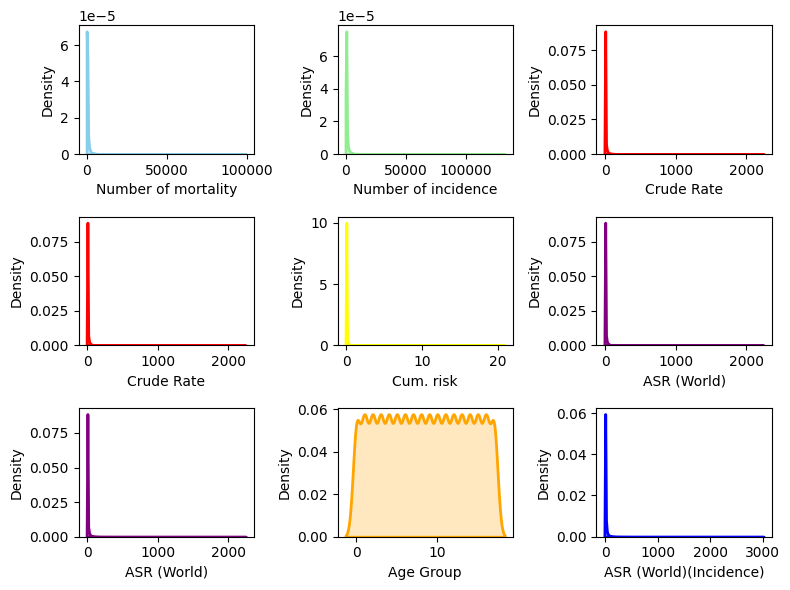

In [ ]:
columns_to_check = ['Number of mortality', 'Number of incidence', 'Crude Rate', 'Cum. risk','ASR (World)','Age Group','ASR (World)(Incidence)','Crude Rate(Incidence)','Cum. risk(Incidence)']

fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(8, 6))

density_colors = ['skyblue', 'lightgreen', 'red', 'yellow','purple','orange','blue','green','maroon']

# Iterate through the list and plot the density for each column
for i in range(3):
    for j in range(3):
        # Access the correct element of the list
        column_name = columns_to_check[i*2+j]
        sns.kdeplot(df[column_name], ax=axes[i, j], fill=True, linewidth=2, color=density_colors[i*2+j])

        # Compute the Interquartile Range (IQR)
        Q1 = df[column_name].quantile(0.25)
        Q3 = df[column_name].quantile(0.75)
        IQR = Q3 - Q1

        # Calculate the Lower and Upper Fence
        Lower_Fence = Q1 - (1.5 * IQR)
        Upper_Fence = Q3 + (1.5 * IQR)

        # Display Outliers
        print(f"\nOutliers for {column_name}:")
        outliers = df[((df[column_name] < Lower_Fence) | (df[column_name] > Upper_Fence))]
        print(outliers)
        print('\n')

plt.tight_layout()

Both features (Number of incidence and Number of mortality) contains outlier.

However, we do not remove them due to:

1. Outliers in other columns represent real-world variations crucial for analysis.
2. Removing outliers leads to worse model performance, as the data might lose important insights.
3. Keeping outliers allows for a better understanding of data distribution and can lead to better results in our analysis and models.

In [ ]:
data_column_category = df.select_dtypes(exclude =[np.number]).columns
print(data_column_category)
print(df[data_column_category].head())

Index([], dtype='object')
Empty DataFrame
Columns: []
Index: [0, 1, 2, 3, 4]


In [ ]:
label_encoder = LabelEncoder()
for i in data_column_category:
    df[i]=label_encoder.fit_transform(df[i])

print("Label Encoder Data: ")
print(df.head())

Label Encoder Data: 
   Population  Gender  Age Group  Cancer Type  Population code (ISO/UN)  \
0           0       0          0            0                         0   
1           1       0          0            0                         1   
2           2       0          0            0                         2   
3           7       0          0            0                         3   
4           3       0          0            0                         4   

   Number of incidence  Number of mortality  ASR (World)  Crude Rate  \
0                    0                    0         0.00        0.00   
1                    1                    0         0.00        0.00   
2                   17                    8         0.26        0.26   
3                    0                    0         0.00        0.00   
4                    0                    0         0.00        0.00   

   Cum. risk  ASR (World)(Incidence)  Crude Rate(Incidence)  \
0        0.0                    

In [ ]:
# Count occurrences of each unique age group
age_group_counts = df['Age Group'].value_counts()

# Print the counts
print(age_group_counts)

Age Group
0     11592
1     11592
16    11592
15    11592
14    11592
13    11592
12    11592
11    11592
10    11592
9     11592
8     11592
7     11592
6     11592
5     11592
4     11592
3     11592
2     11592
17    11592
Name: count, dtype: int64


In [ ]:
#Check the statistics of the data again after preprocessing the data
df.describe()

,Population,Gender,Age Group,Cancer Type,Population code (ISO/UN),Number of incidence,Number of mortality,ASR (World),Crude Rate,Cum. risk,ASR (World)(Incidence),Crude Rate(Incidence),Cum. risk(Incidence)
count,208656.000000,208656.000000,208656.00000,208656.000000,208656.000000,208656.000000,208656.000000,208656.000000,208656.000000,208656.000000,208656.000000,208656.000000,208656.000000
mean,91.500000,0.523810,8.50000,16.714286,91.500000,90.051319,42.725965,8.835373,8.835373,0.064747,14.515473,14.515473,0.104458
std,53.115568,0.499434,5.18814,10.837100,53.115568,1049.503135,589.493258,37.967470,37.967470,0.351723,56.201696,56.201696,0.527920
min,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,45.750000,0.000000,4.00000,7.000000,45.750000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,91.500000,1.000000,8.50000,15.000000,91.500000,1.000000,1.000000,0.030000,0.030000,0.000000,0.640000,0.640000,0.000000
75%,137.250000,1.000000,13.00000,28.000000,137.250000,14.000000,6.000000,3.400000,3.400000,0.020000,7.300000,7.300000,0.040000
max,183.000000,1.000000,17.00000,35.000000,183.000000,132486.000000,99144.000000,2238.000000,2238.000000,20.800000,3002.100000,3002.100000,30.100000


## **Data Visualization**

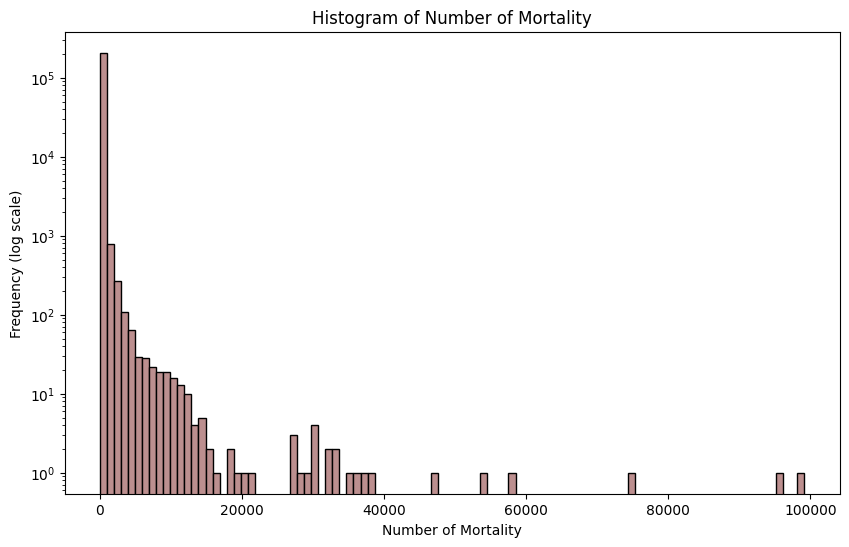

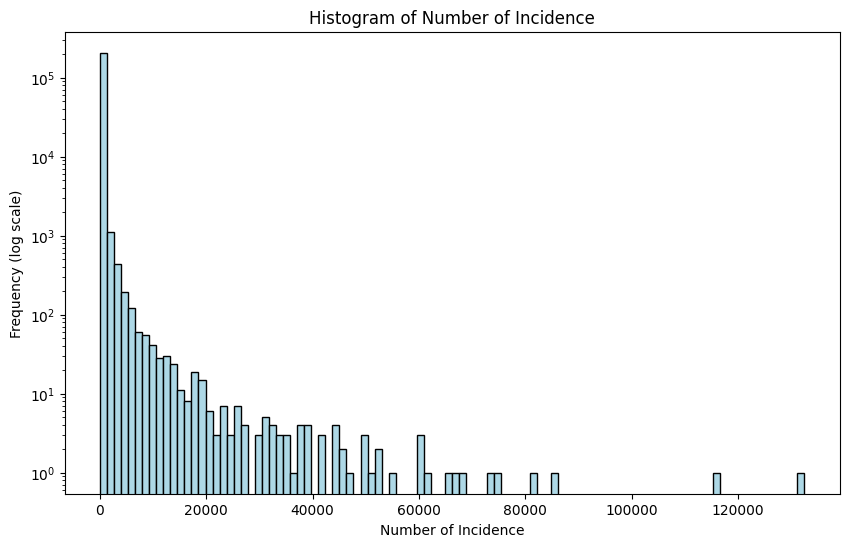

In [ ]:
# Univariate
# Numerical data
# Create histogram for Number of Mortality with logarithmic scaling
plt.figure(figsize=(10, 6))
plt.hist(df['Number of mortality'], bins=100, edgecolor='black', log=True, color='rosybrown')
plt.title('Histogram of Number of Mortality')
plt.xlabel('Number of Mortality')
plt.ylabel('Frequency (log scale)')
plt.show()

# Create histogram for Number of Incidence with logarithmic scaling
plt.figure(figsize=(10, 6))
plt.hist(df['Number of incidence'], bins=100, edgecolor='black', log=True, color='lightblue')
plt.title('Histogram of Number of Incidence')
plt.xlabel('Number of Incidence')
plt.ylabel('Frequency (log scale)')
plt.show()

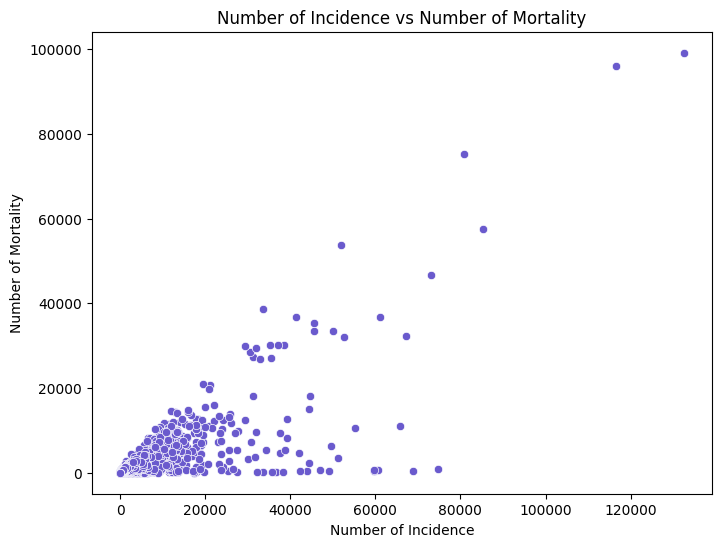

In [ ]:
# Bivariate
# Scatter plot for Number of Incidence vs Number of Mortality
plt.figure(figsize=(8, 6))
sns.scatterplot(x='Number of incidence', y='Number of mortality', data=df, color='slateblue')
plt.title('Number of Incidence vs Number of Mortality')
plt.xlabel('Number of Incidence')
plt.ylabel('Number of Mortality')
plt.show()

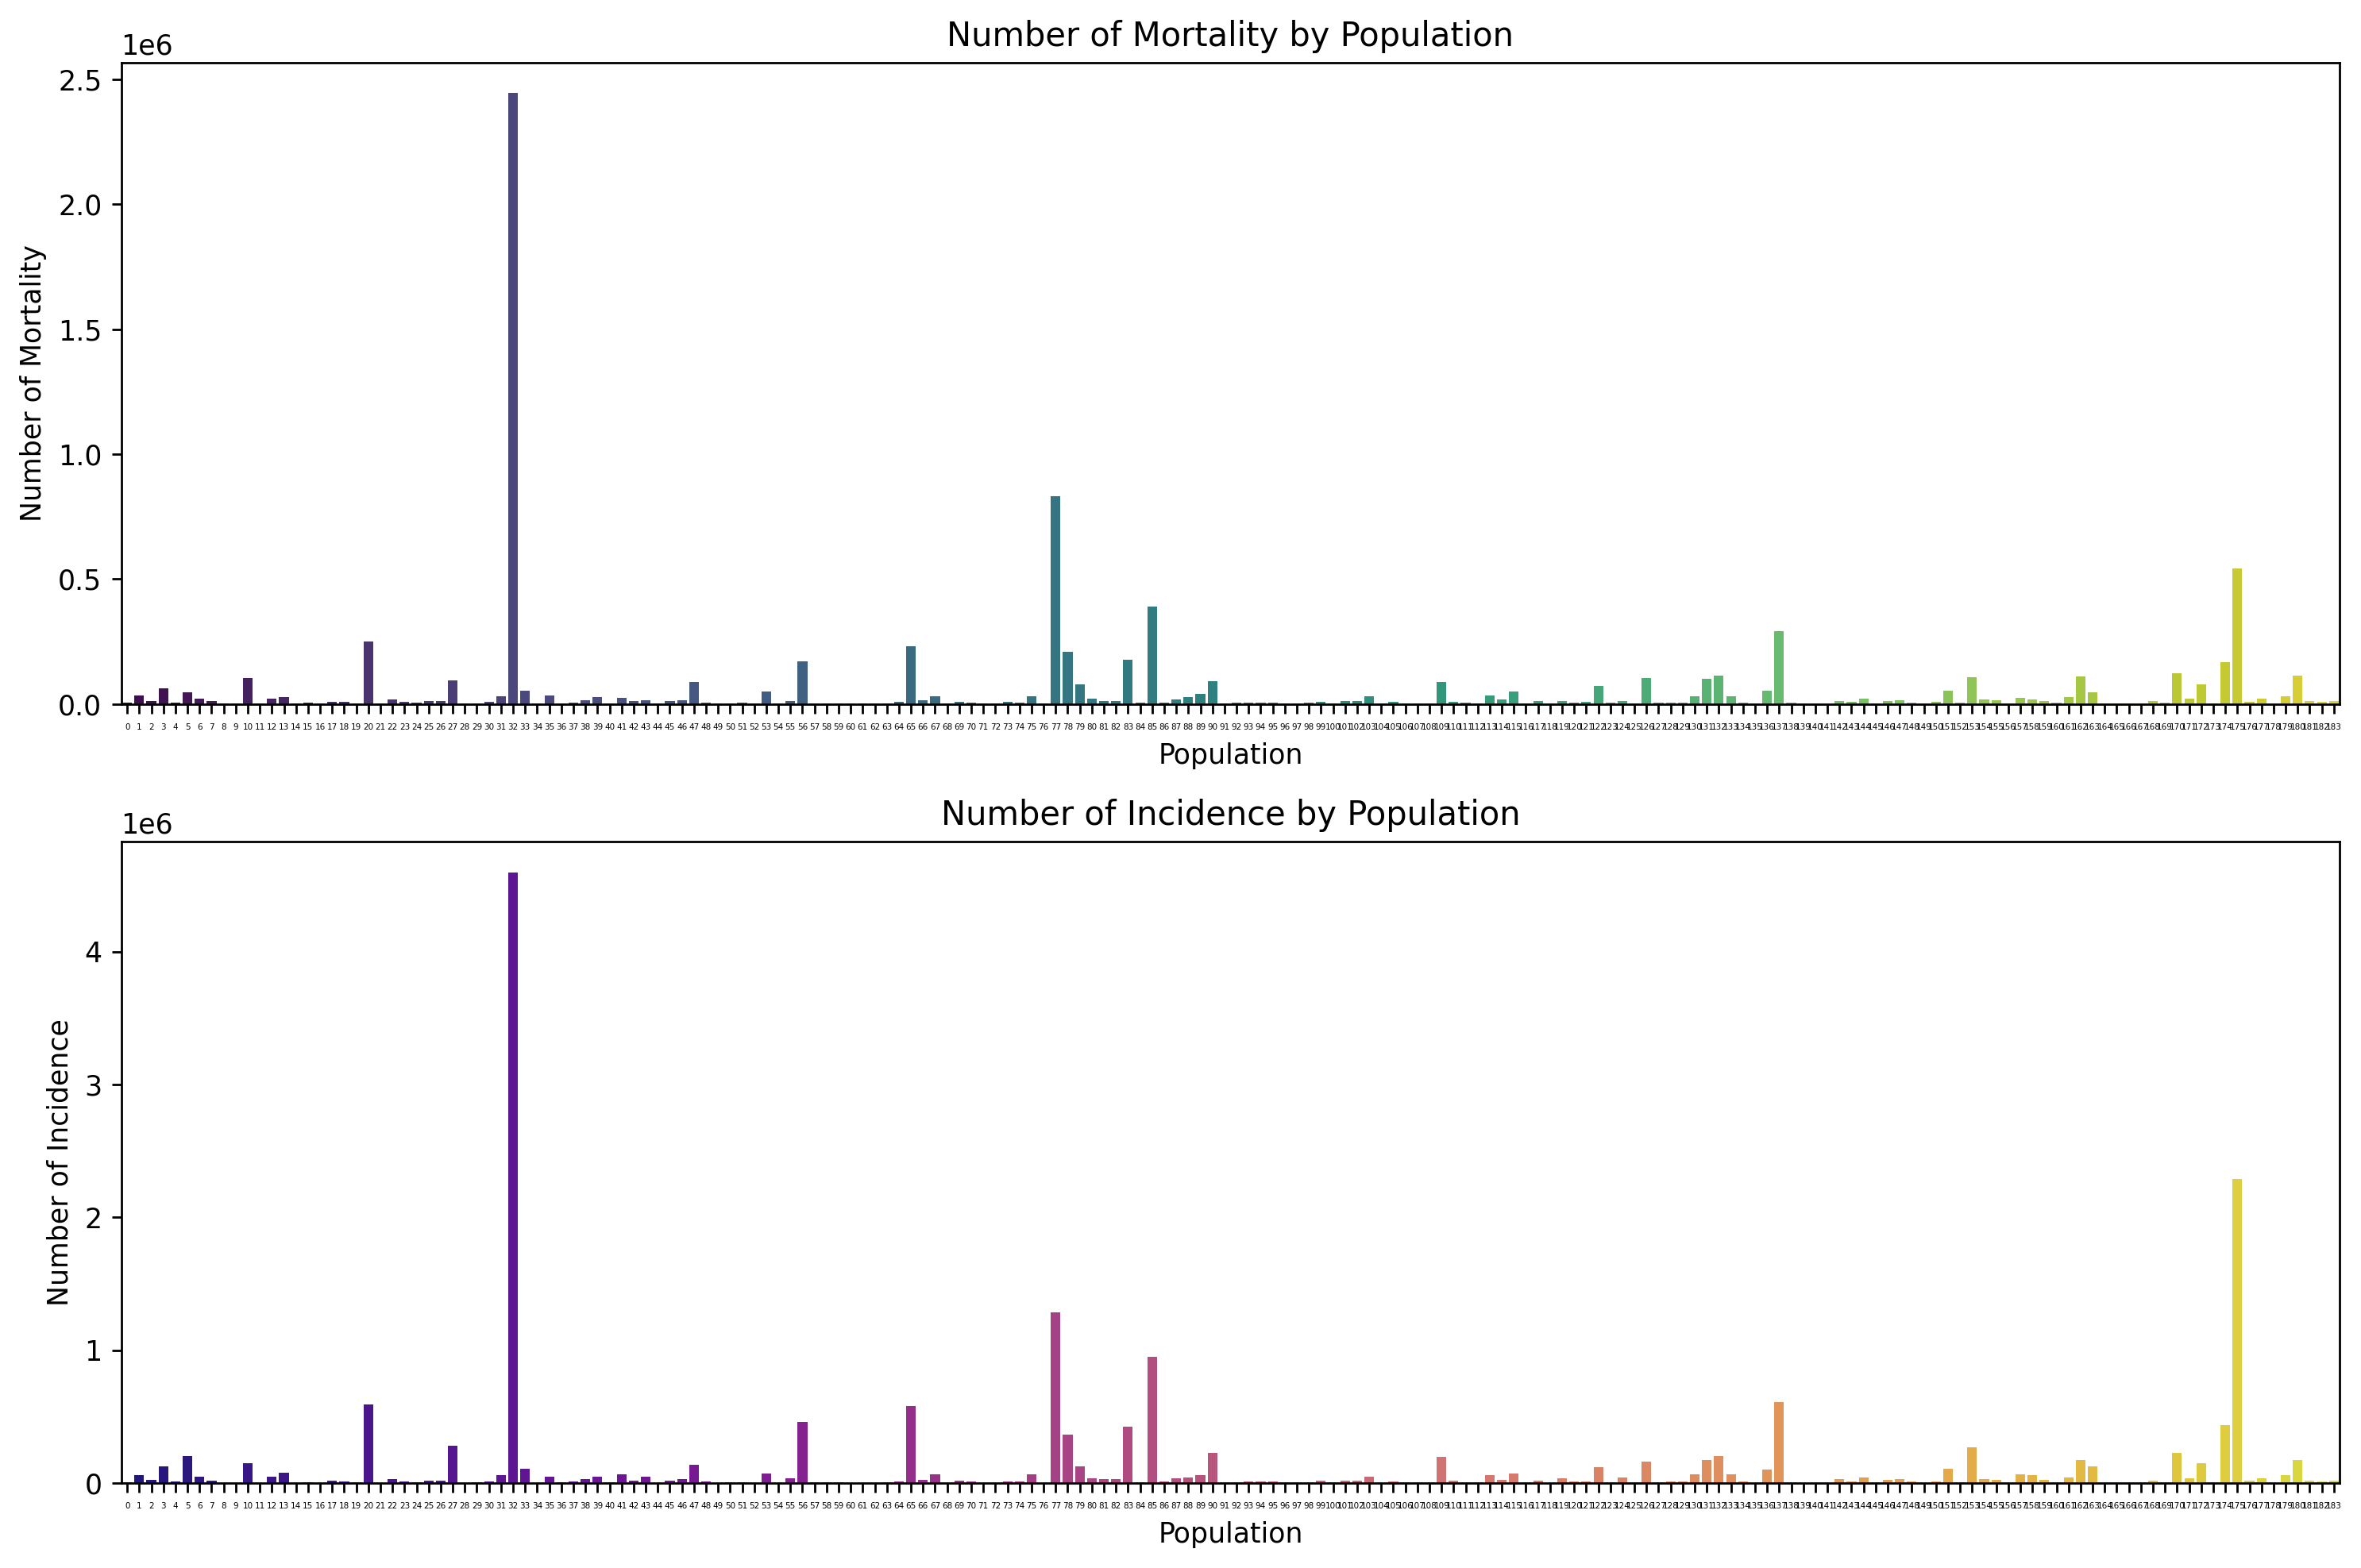

In [ ]:
# Group by 'Population' and sum the 'Number of mortality' and 'Number of incidence'
grouped_df = df.groupby('Population').agg({'Number of mortality': 'sum', 'Number of incidence': 'sum'}).reset_index()

# Set the color palettes for the bar plots
colors_mortality = sns.color_palette("viridis", len(grouped_df['Population'].unique()))
colors_incidence = sns.color_palette("plasma", len(grouped_df['Population'].unique()))

# Set the figure size and create subplots
plt.figure(figsize=(12, 8), dpi=250)

# Grouped bar plot for Number of Mortality
sns.barplot(x='Population', y='Number of mortality', data=grouped_df, ax=plt.subplot(2, 1, 1), palette=colors_mortality, hue='Population', legend=False)
plt.title('Number of Mortality by Population')
plt.xlabel('Population', fontsize=10)
plt.ylabel('Number of Mortality')
plt.xticks(fontsize=3)

# Grouped bar plot for Number of Incidence
sns.barplot(x='Population', y='Number of incidence', data=grouped_df, ax=plt.subplot(2, 1, 2), palette=colors_incidence, hue='Population', legend=False)
plt.title('Number of Incidence by Population')
plt.xlabel('Population', fontsize=10)
plt.ylabel('Number of Incidence')
plt.xticks(fontsize=3)

plt.tight_layout()
plt.show()

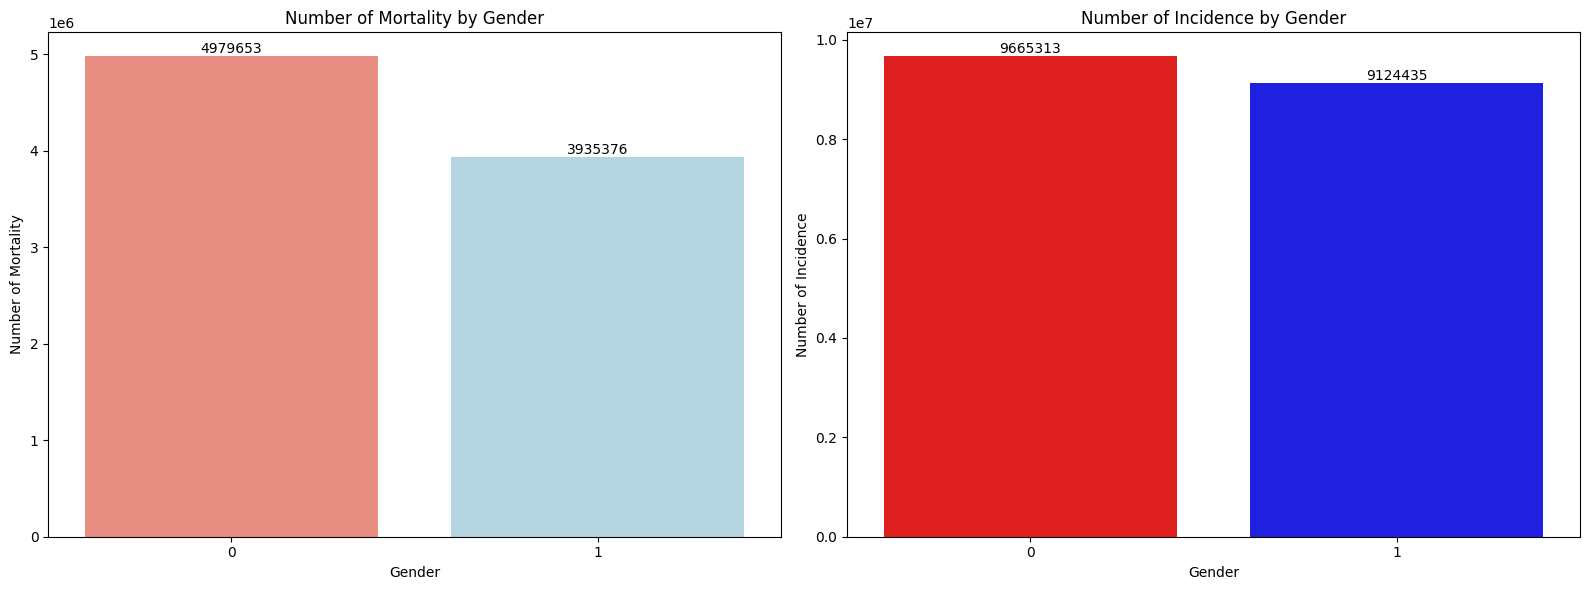

In [ ]:
colors_mortality = ['salmon', 'lightblue']
colors_incidence = ['red', 'blue']

# Group by 'Gender' and sum the values
grouped_df = df.groupby('Gender').sum().reset_index()

# Create a figure and axes for subplots
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(16, 6))

# Bar plot for Gender vs Sum of Mortality
sns.barplot(x='Gender', y='Number of mortality', data=grouped_df, ax=axes[0], palette=colors_mortality, hue='Cancer Type', legend=False)
axes[0].set_title('Number of Mortality by Gender')
axes[0].set_xlabel('Gender')
axes[0].set_ylabel('Number of Mortality')
for i, val in enumerate(grouped_df['Number of mortality']):
    axes[0].text(i, val + 1, str(val), ha='center', va='bottom')

# Bar plot for Gender vs Sum of Incidence
sns.barplot(x='Gender', y='Number of incidence', data=grouped_df, ax=axes[1], palette=colors_incidence, hue='Cancer Type', legend=False)
axes[1].set_title('Number of Incidence by Gender')
axes[1].set_xlabel('Gender')
axes[1].set_ylabel('Number of Incidence')
for i, val in enumerate(grouped_df['Number of incidence']):
    axes[1].text(i, val + 1, str(val), ha='center', va='bottom')

plt.tight_layout()
plt.show()

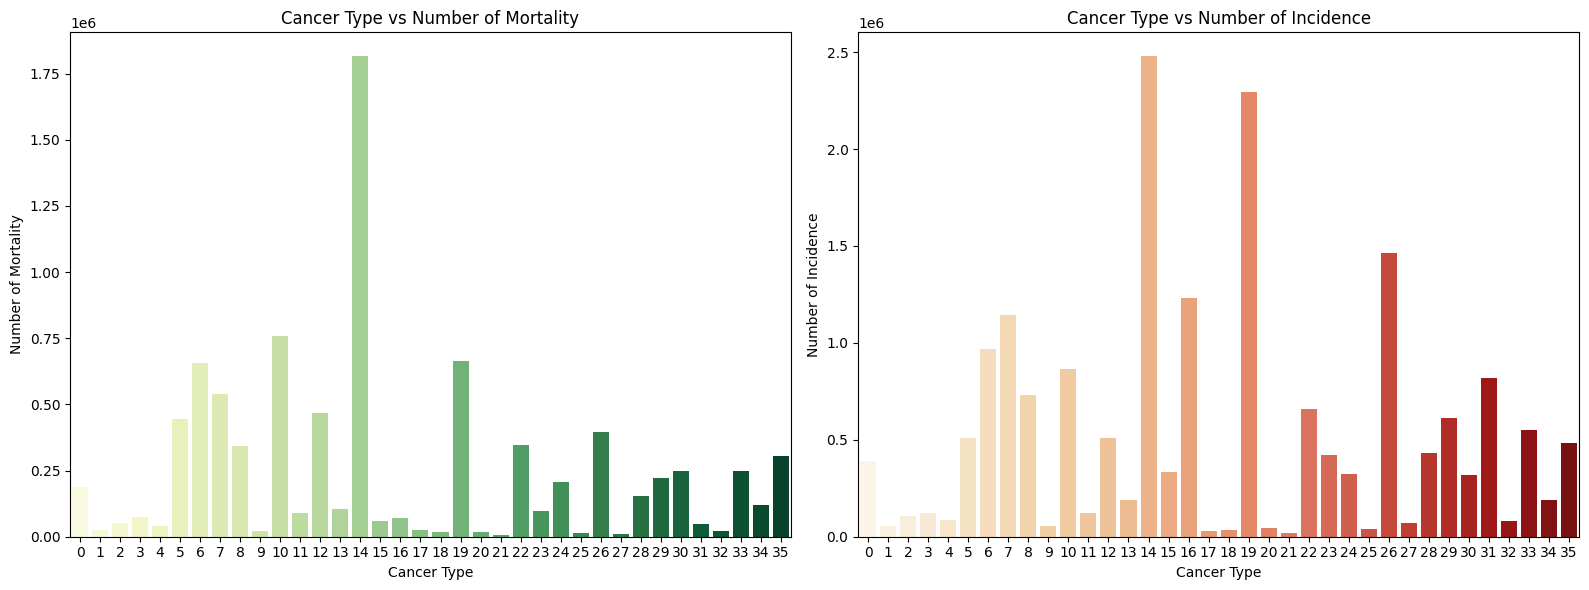

In [ ]:
colors_mortality = sns.color_palette("YlGn", len(df['Cancer Type'].unique()))
colors_incidence = sns.color_palette("OrRd", len(df['Cancer Type'].unique()))

# Calculate sum of mortality and incidence for each Cancer Type
sum_mortality = df.groupby('Cancer Type')['Number of mortality'].sum().reset_index()
sum_incidence = df.groupby('Cancer Type')['Number of incidence'].sum().reset_index()

# Create a figure and axes for subplots
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(16, 6))

# Bar plot for Cancer Type vs Sum of Mortality with gradient colors
sns.barplot(x='Cancer Type', y='Number of mortality', data=sum_mortality, ax=axes[0], errorbar=None, palette=colors_mortality, hue='Cancer Type', legend=False)
axes[0].set_title('Cancer Type vs Number of Mortality')
axes[0].set_xlabel('Cancer Type')
axes[0].set_ylabel('Number of Mortality')

# Bar plot for Cancer Type vs Sum of Incidence with gradient colors
sns.barplot(x='Cancer Type', y='Number of incidence', data=sum_incidence, ax=axes[1], errorbar=None, palette=colors_incidence, hue='Cancer Type', legend=False)
axes[1].set_title('Cancer Type vs Number of Incidence')
axes[1].set_xlabel('Cancer Type')
axes[1].set_ylabel('Number of Incidence')

# Adjust layout
plt.tight_layout()
plt.show()

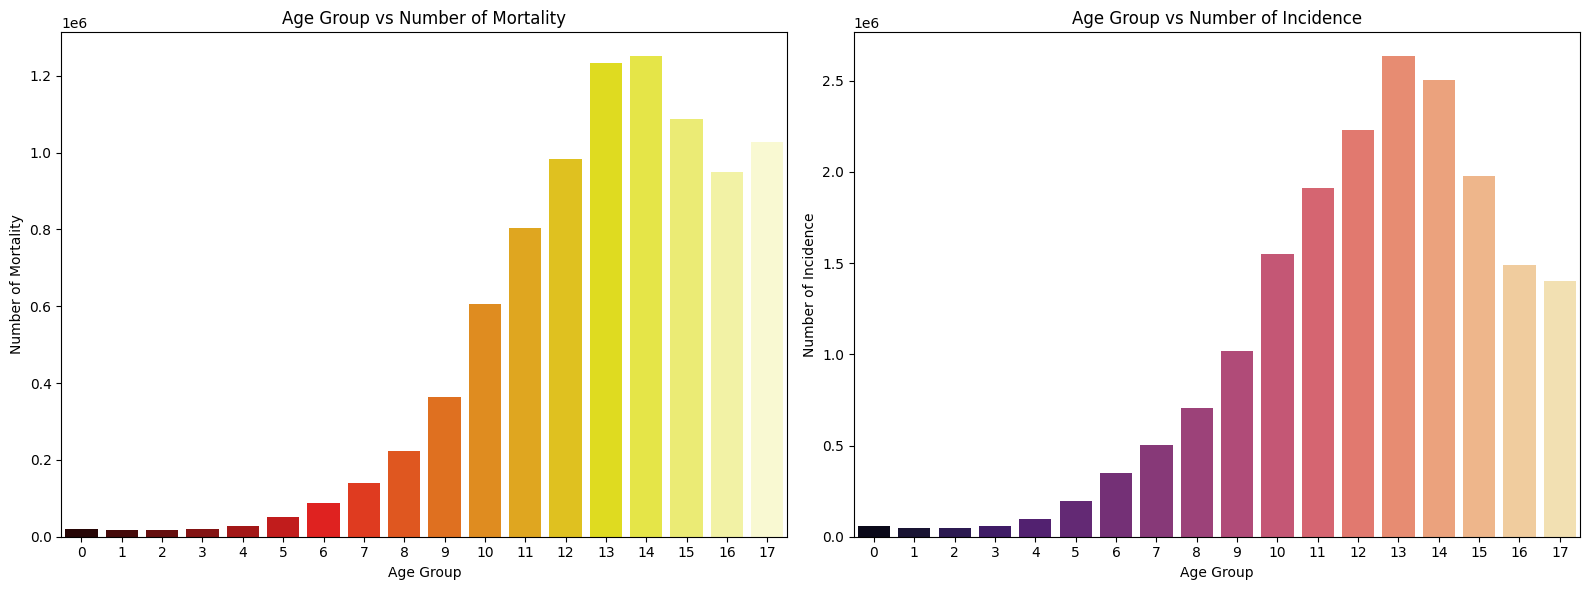

In [ ]:
colors_mortality = sns.color_palette("hot", len(df['Age Group'].unique()))
colors_incidence = sns.color_palette("magma", len(df['Age Group'].unique()))

# Calculate sum of mortality and incidence for each Age Group
sum_mortality = df.groupby('Age Group')['Number of mortality'].sum().reset_index()
sum_incidence = df.groupby('Age Group')['Number of incidence'].sum().reset_index()

# Create a figure and axes for subplots
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(16, 6))

# Bar plot for Age Group vs Sum of Mortality with gradient colors
sns.barplot(x='Age Group', y='Number of mortality', data=sum_mortality, ax=axes[0], errorbar=None, palette=colors_mortality, hue='Age Group', legend=False)
axes[0].set_title('Age Group vs Number of Mortality')
axes[0].set_xlabel('Age Group')
axes[0].set_ylabel('Number of Mortality')

# Bar plot for Age Group vs Sum of Incidence with gradient colors
sns.barplot(x='Age Group', y='Number of incidence', data=sum_incidence, ax=axes[1], errorbar=None, palette=colors_incidence, hue='Age Group', legend=False)
axes[1].set_title('Age Group vs Number of Incidence')
axes[1].set_xlabel('Age Group')
axes[1].set_ylabel('Number of Incidence')

# Adjust layout
plt.tight_layout()
plt.show()

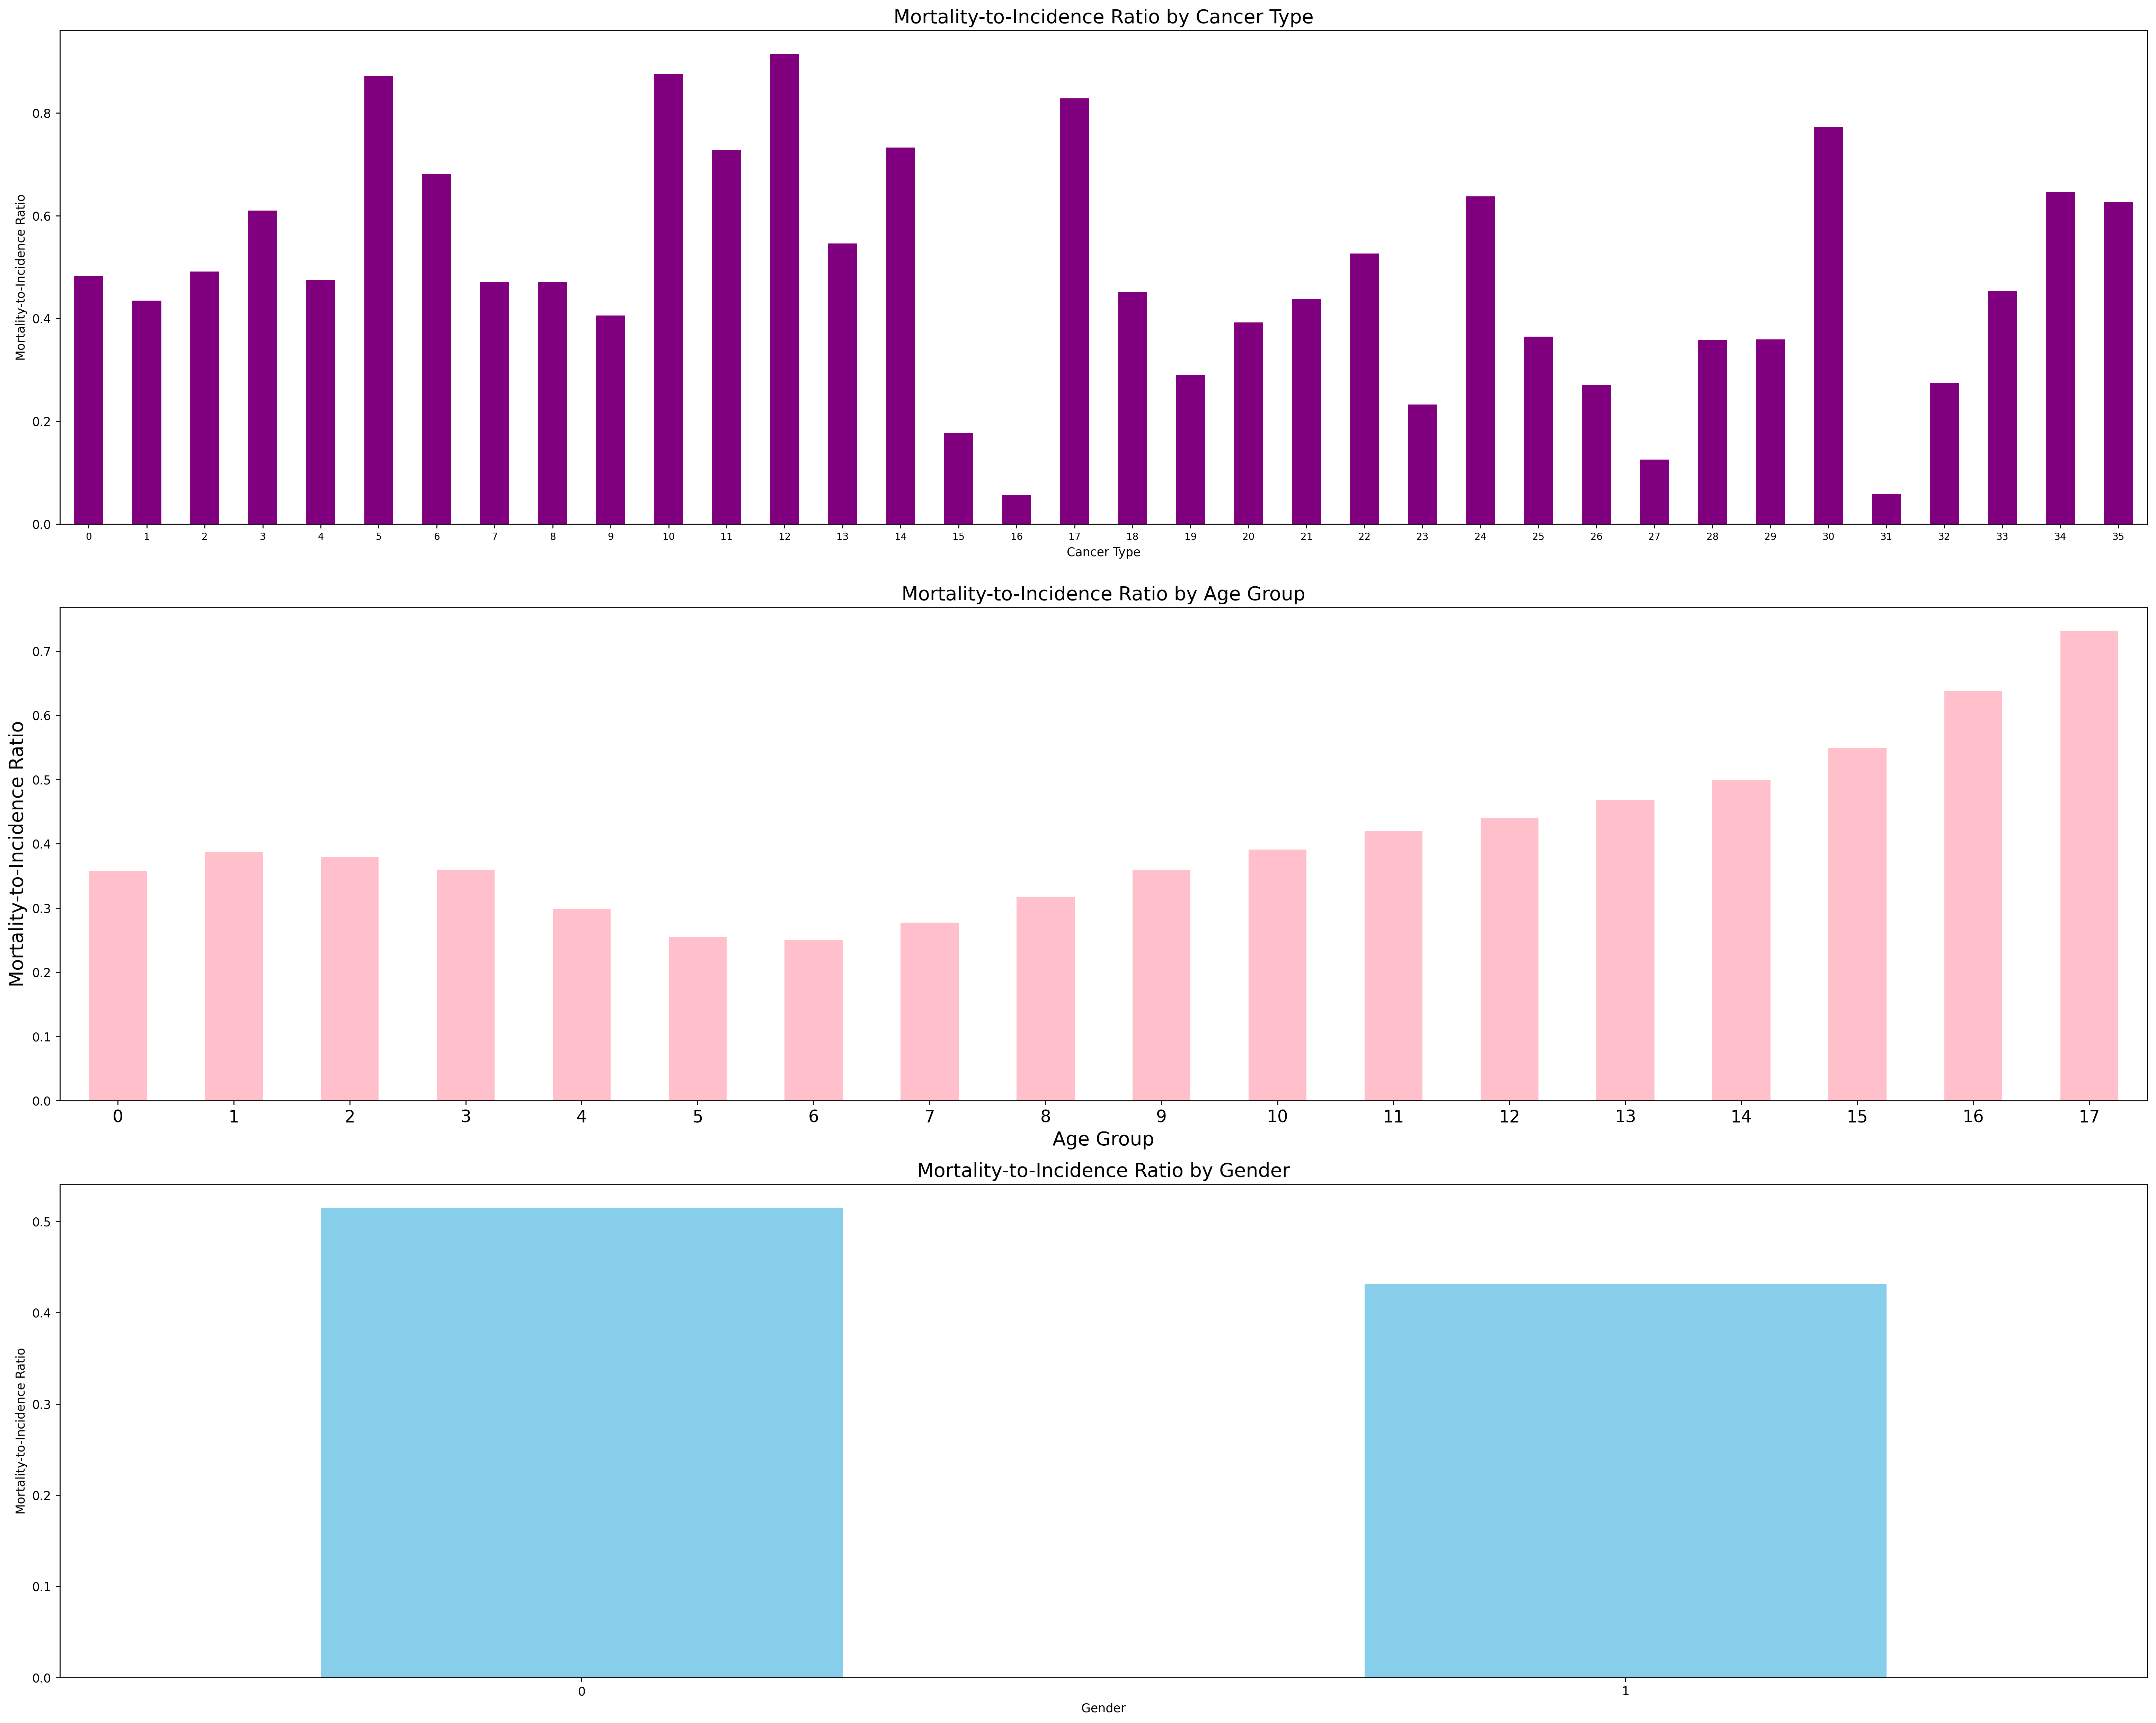

In [ ]:
fig, axes = plt.subplots(nrows=3, figsize=(25, 20), dpi=250)

# Calculate mortality to incidence ratio by Cancer Type and Population
mortality_to_incidence_ratio_cancer_type = df.groupby('Cancer Type')['Number of mortality'].sum() / df.groupby('Cancer Type')['Number of incidence'].sum()
mortality_to_incidence_ratio_age_group = df.groupby('Age Group')['Number of mortality'].sum() / df.groupby('Age Group')['Number of incidence'].sum()
mortality_to_incidence_ratio_gender = df.groupby('Gender')['Number of mortality'].sum() / df.groupby('Gender')['Number of incidence'].sum()

# bar plot
mortality_to_incidence_ratio_cancer_type.plot(kind='bar', color='purple', ax=axes[0])
axes[0].set_title('Mortality-to-Incidence Ratio by Cancer Type',fontsize= 16)
axes[0].set_xlabel('Cancer Type')
axes[0].set_ylabel('Mortality-to-Incidence Ratio')
axes[0].tick_params(axis='x', rotation=0, labelsize=8)

mortality_to_incidence_ratio_age_group.plot(kind='bar', color='pink', ax=axes[1])
axes[1].set_title('Mortality-to-Incidence Ratio by Age Group',fontsize= 16)
axes[1].set_xlabel('Age Group', fontsize=16)
axes[1].set_ylabel('Mortality-to-Incidence Ratio', fontsize=16)
axes[1].tick_params(axis='x', rotation=0, labelsize=14)

mortality_to_incidence_ratio_gender.plot(kind='bar', color='skyblue', ax=axes[2])
axes[2].set_title('Mortality-to-Incidence Ratio by Gender',fontsize= 16)
axes[2].set_xlabel('Gender')
axes[2].set_ylabel('Mortality-to-Incidence Ratio')
axes[2].tick_params(axis='x', rotation=0, labelsize=10)

plt.tight_layout()
plt.show()


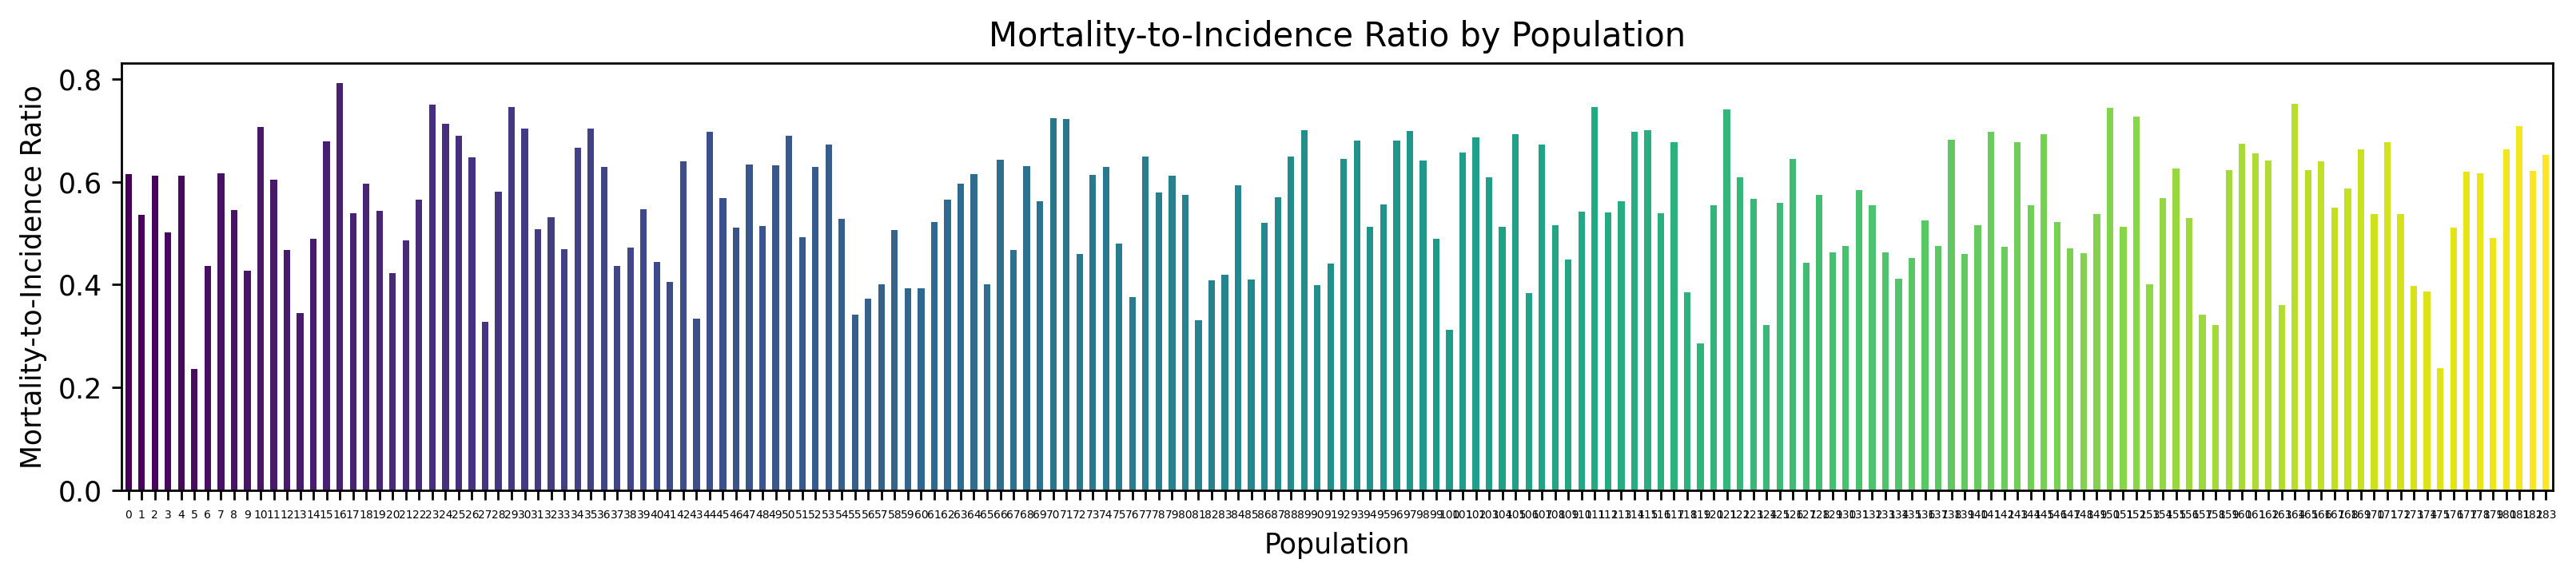

In [ ]:
colors_mortality = sns.color_palette("viridis", len(df['Population'].unique()))
#Create a figure and axes for subplots
fig, axes = plt.subplots(nrows=1,ncols=1, figsize=(13, 3), dpi=250)

# Calculate mortality to incidence ratio by Cancer Type and Population
mortality_to_incidence_ratio_population = df.groupby('Population')['Number of mortality'].sum() / df.groupby('Population')['Number of incidence'].sum()

mortality_to_incidence_ratio_population.plot(kind='bar', color= colors_mortality, ax=axes)
axes.set_title('Mortality-to-Incidence Ratio by Population')
axes.set_xlabel('Population')
axes.set_ylabel('Mortality-to-Incidence Ratio')
axes.tick_params(axis='x', rotation=0, labelsize=4)

plt.tight_layout()
plt.show()

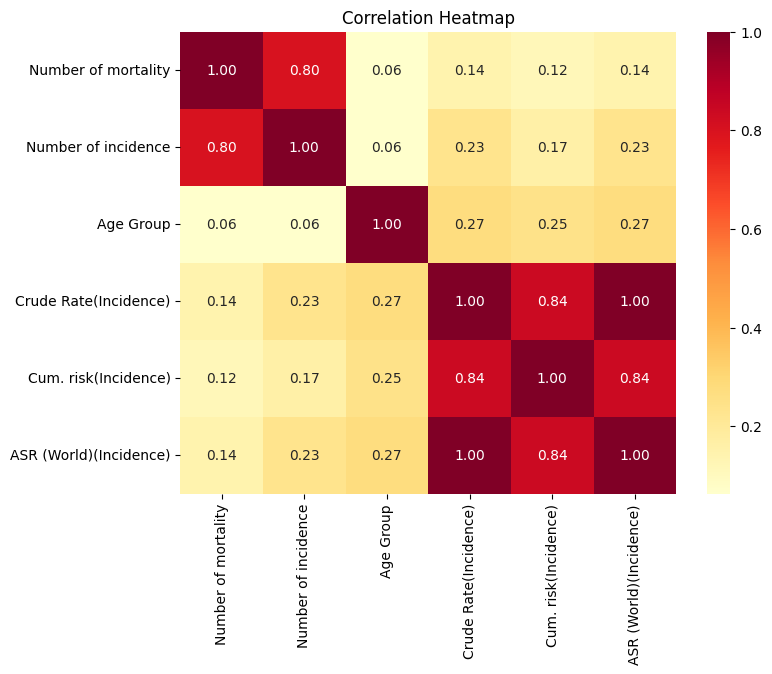

In [ ]:
# Correlation Analysis
# Select the columns of interest for correlation
columns_of_interest = ['Number of mortality', 'Number of incidence','Age Group','Crude Rate(Incidence)','Cum. risk(Incidence)','ASR (World)(Incidence)']
corr_matrix = df[columns_of_interest].corr()

# Plot correlation heatmap for selected columns
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap='YlOrRd', fmt='.2f')
plt.title('Correlation Heatmap')
plt.show()

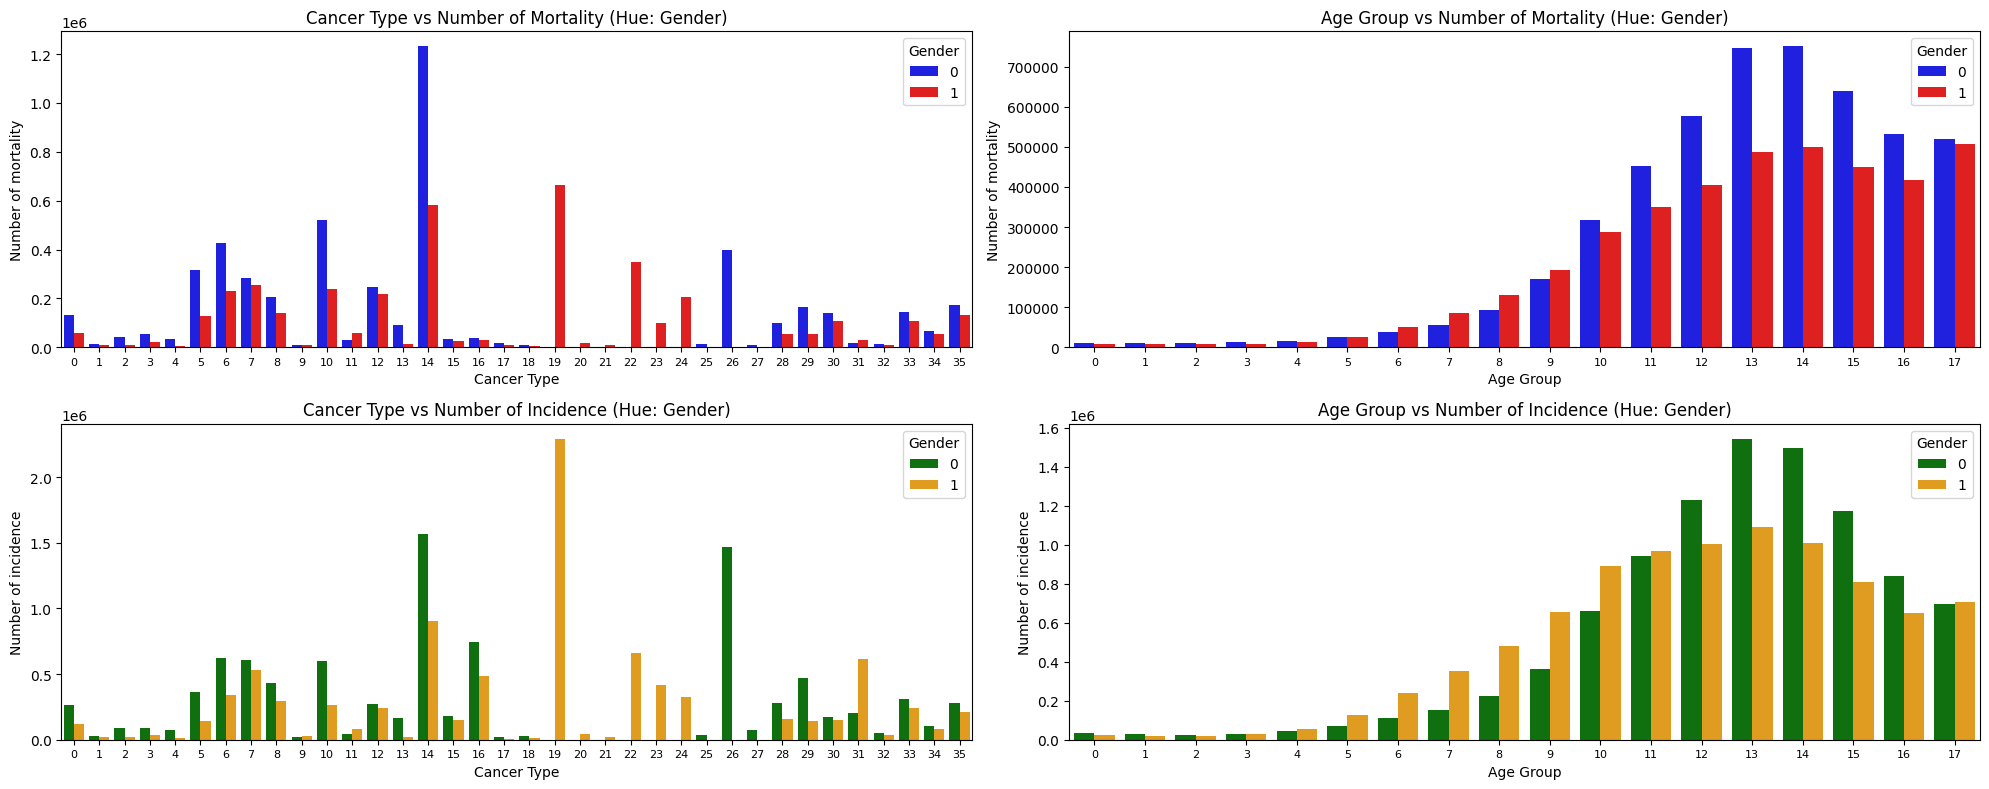

In [ ]:
custom_palette = {0: 'blue', 1: 'red'}
custom_palette2 = {0: 'green', 1: 'orange'}

# Calculate sum of mortality and incidence for each Cancer Type, Age Group, and Gender
sum_mortality_cancer = df.groupby(['Cancer Type', 'Gender'])['Number of mortality'].sum().reset_index()
sum_mortality_age = df.groupby(['Age Group', 'Gender'])['Number of mortality'].sum().reset_index()
sum_incidence_cancer = df.groupby(['Cancer Type', 'Gender'])['Number of incidence'].sum().reset_index()
sum_incidence_age = df.groupby(['Age Group', 'Gender'])['Number of incidence'].sum().reset_index()

# Create a figure and axes for subplots
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(20, 8))

# Plot 1: Cancer Type vs Sum of Mortality (Hue: Gender)
sns.barplot(x='Cancer Type', y='Number of mortality', hue='Gender', data=sum_mortality_cancer, ax=axes[0][0], errorbar=None, palette=custom_palette)
axes[0][0].set_title('Cancer Type vs Number of Mortality (Hue: Gender)')
axes[0][0].tick_params(axis='x', labelsize=8)

# Plot 2: Age Group vs Sum of Mortality (Hue: Gender)
sns.barplot(x='Age Group', y='Number of mortality', hue='Gender', data=sum_mortality_age, ax=axes[0][1], errorbar=None, palette=custom_palette)
axes[0][1].set_title('Age Group vs Number of Mortality (Hue: Gender)')
axes[0][1].tick_params(axis='x', labelsize=8)

# Plot 3: Cancer Type vs Sum of Incidence (Hue: Gender)
sns.barplot(x='Cancer Type', y='Number of incidence', hue='Gender', data=sum_incidence_cancer, ax=axes[1][0], errorbar=None, palette=custom_palette2)
axes[1][0].set_title('Cancer Type vs Number of Incidence (Hue: Gender)')
axes[1][0].tick_params(axis='x', labelsize=8)

# Plot 4: Age Group vs Sum of Incidence (Hue: Gender)
sns.barplot(x='Age Group', y='Number of incidence', hue='Gender', data=sum_incidence_age, ax=axes[1][1], errorbar=None, palette=custom_palette2)
axes[1][1].set_title('Age Group vs Number of Incidence (Hue: Gender)')
axes[1][1].tick_params(axis='x', labelsize=8)

plt.tight_layout()
plt.show()

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 208656 entries, 0 to 208655
Data columns (total 13 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   Population                208656 non-null  int64  
 1   Gender                    208656 non-null  int64  
 2   Age Group                 208656 non-null  int64  
 3   Cancer Type               208656 non-null  int64  
 4   Population code (ISO/UN)  208656 non-null  int64  
 5   Number of incidence       208656 non-null  int64  
 6   Number of mortality       208656 non-null  int64  
 7   ASR (World)               208656 non-null  float64
 8   Crude Rate                208656 non-null  float64
 9   Cum. risk                 208656 non-null  float64
 10  ASR (World)(Incidence)    208656 non-null  float64
 11  Crude Rate(Incidence)     208656 non-null  float64
 12  Cum. risk(Incidence)      208656 non-null  float64
dtypes: float64(6), int64(7)
memory usage: 20.7 M

In [ ]:
# Split the dataset into features and target
features = [
    'Population',
    'Gender',
    'Age Group',
    'Cancer Type',
    'Number of incidence',
    'Cum. risk(Incidence)',
    'ASR (World)(Incidence)',
    'Crude Rate(Incidence)'
]

target = 'Number of mortality'

X = df[features]
y = df[target]

# Check the shape of features and target
print("Shape of features:", X.shape)
print("Shape of target:", y.shape)

Shape of features: (208656, 8)
Shape of target: (208656,)


In [ ]:
from sklearn.ensemble import RandomForestRegressor

# Initialize Random Forest model
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)

# Fit the model
rf_model.fit(X, y)

# Get feature importances
feature_importances = rf_model.feature_importances_

# Create a DataFrame to display feature importances
feature_importance_df = pd.DataFrame({'Feature': X.columns, 'Importance': feature_importances})

# Sort features based on importance scores
ranked_features_rf = feature_importance_df.sort_values(by='Importance', ascending=False)

# Print the ranked features based on Random Forest feature importance
print("Ranked features based on Random Forest feature importance:")
print(ranked_features_rf)


Ranked features based on Random Forest feature importance:
                  Feature  Importance
4     Number of incidence    0.801694
3             Cancer Type    0.128640
2               Age Group    0.018286
7   Crude Rate(Incidence)    0.015885
6  ASR (World)(Incidence)    0.015388
5    Cum. risk(Incidence)    0.011421
0              Population    0.006390
1                  Gender    0.002296


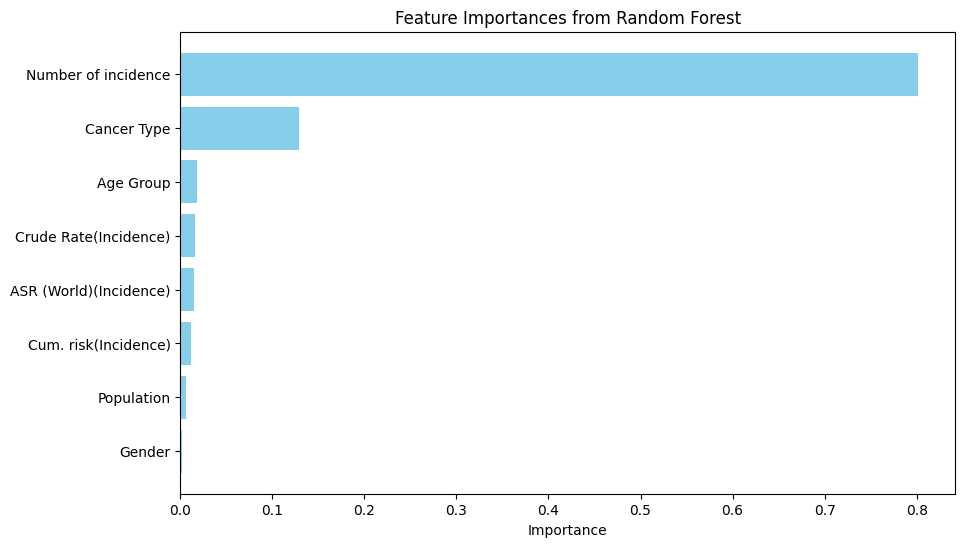

In [ ]:
# Plotting the feature importances
plt.figure(figsize=(10, 6))
plt.barh(ranked_features_rf['Feature'], ranked_features_rf['Importance'], color='skyblue')
plt.xlabel('Importance')
plt.title('Feature Importances from Random Forest')
plt.gca().invert_yaxis()
plt.show()

In [ ]:
# Feature selection
df.drop(columns=['Crude Rate'], inplace=True)
df.drop(columns=['Population code (ISO/UN)'], inplace=True)
df.drop(columns=['Cum. risk'], inplace=True)
df.drop(columns=['ASR (World)'], inplace=True)
df.drop(columns=['Cum. risk(Incidence)'], inplace=True)
df.drop(columns=['ASR (World)(Incidence)'], inplace=True)

**Reason for dropping "Crude Rate","Cum. risk", "ASR (World)"**

*   Crude rate, Cum. risk and ASR (World) derived from the number of mortality (target variable), including number of mortality in the model would cause data leakage.


- This will affect the final result therefore need to be dropped.

**Reason for dropping "Cum. risk(Incidence)":**
*  High Correlation (>0.8) with "Crude Rate(Incidence)".
*  Has lower importance rate compare to "Crude Rate(Incidence)" and "ASR(World)(Incidence)".

**Reason for dropping "ASR (World)(Incidence)":**
*   Duplicate data with "Crude Rate(Incidence)".
*   Has lower importance rate compare to "Crude Rate(Incidence)"



**Reason for dropping "Population code (ISO/UN)":**
- The "Population code (ISO/UN)" is an identifier for different populations or regions.

- The "Population" feature already provides sufficient information to identify the population without the need for an additional code.

In [ ]:
df.describe()

,Population,Gender,Age Group,Cancer Type,Number of incidence,Number of mortality,Crude Rate(Incidence)
count,208656.000000,208656.000000,208656.00000,208656.000000,208656.000000,208656.000000,208656.000000
mean,91.500000,0.523810,8.50000,16.714286,90.051319,42.725965,14.515473
std,53.115568,0.499434,5.18814,10.837100,1049.503135,589.493258,56.201696
min,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000
25%,45.750000,0.000000,4.00000,7.000000,0.000000,0.000000,0.000000
50%,91.500000,1.000000,8.50000,15.000000,1.000000,1.000000,0.640000
75%,137.250000,1.000000,13.00000,28.000000,14.000000,6.000000,7.300000
max,183.000000,1.000000,17.00000,35.000000,132486.000000,99144.000000,3002.100000


In [ ]:
minmax_scale = preprocessing.MinMaxScaler().fit_transform(df)
scaled_frame = pd.DataFrame(minmax_scale, columns = df.columns)
print(scaled_frame.head())

   Population  Gender  Age Group  Cancer Type  Number of incidence  \
0    0.000000     0.0        0.0          0.0             0.000000   
1    0.005464     0.0        0.0          0.0             0.000008   
2    0.010929     0.0        0.0          0.0             0.000128   
3    0.038251     0.0        0.0          0.0             0.000000   
4    0.016393     0.0        0.0          0.0             0.000000   

   Number of mortality  Crude Rate(Incidence)  
0             0.000000               0.000000  
1             0.000000               0.000013  
2             0.000081               0.000187  
3             0.000000               0.000000  
4             0.000000               0.000000  


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 208656 entries, 0 to 208655
Data columns (total 7 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   Population             208656 non-null  int64  
 1   Gender                 208656 non-null  int64  
 2   Age Group              208656 non-null  int64  
 3   Cancer Type            208656 non-null  int64  
 4   Number of incidence    208656 non-null  int64  
 5   Number of mortality    208656 non-null  int64  
 6   Crude Rate(Incidence)  208656 non-null  float64
dtypes: float64(1), int64(6)
memory usage: 11.1 MB


In [ ]:
df_dummies = pd.get_dummies(scaled_frame, drop_first=True)
print('There are {} columns in df_dummies'.format(df_dummies.shape[1]))

There are 7 columns in df_dummies


In [ ]:
df_shuffled = shuffle (df_dummies, random_state=42)

In [ ]:
DV= 'Number of mortality'
X = df_shuffled.drop(DV, axis=1)
y = df_shuffled [DV]

In [ ]:
#Train and test data split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)
print(X_train.head(20))

        Population  Gender  Age Group  Cancer Type  Number of incidence  \
177237    0.245902     1.0   0.235294     0.885714             0.000091   
111038    0.480874     1.0   0.764706     0.457143             0.000294   
176271    0.994536     1.0   0.058824     0.885714             0.000000   
82334     0.480874     1.0   0.411765     0.342857             0.000189   
117545    1.000000     0.0   0.764706     0.485714             0.000000   
166181    0.158470     1.0   0.588235     0.828571             0.000008   
4298      0.371585     1.0   0.647059     0.000000             0.000008   
30924     0.071038     0.0   0.705882     0.114286             0.000294   
75079     0.043716     0.0   0.352941     0.314286             0.000000   
150505    0.125683     0.0   0.411765     0.742857             0.000000   
172223    0.994536     1.0   0.470588     0.857143             0.000106   
26241     0.622951     0.0   1.000000     0.085714             0.000000   
5132      0.907104     1.

# **Model Selection**

Based on our datasets and target variables, we have choosen 6 models from supervised learning, includes


1. Linear Regression
2. Polynomial Regression
3. Lasso Regression
4. Ridge Regression
5. Random Forest Regression
6. Gradient Boosting Regression




# **Model Training and Hyperparameter Tuning**

# **Linear Regression**

In [ ]:
model = LinearRegression()
model.fit(X_train,y_train)

LinearRegression()

In [ ]:
predictions = model.predict(X_test)

In [ ]:
mse_linear1 = mean_squared_error(y_test, predictions)
rmse_linear1 = np.sqrt(mse_linear1)
r2_linear1 = r2_score(y_test,predictions)

print("\nModel evaluation")
print("Mean Squared Error (MSE):",mse_linear1)
print("RMSE:",rmse_linear1)
print("R-squared",r2_linear1)


Model evaluation
Mean Squared Error (MSE): 8.243698464293278e-06
RMSE: 0.002871184157154201
R-squared 0.6772431172583682


# **Polynomial Regression**

In [ ]:
#Degree of 1
poly_features = PolynomialFeatures(degree = 1, include_bias = False)
X_train_poly1 = poly_features.fit_transform(X_train)

In [ ]:
model = LinearRegression()
model.fit(X_train_poly1, y_train)

LinearRegression()

In [ ]:
X_test_poly1 = poly_features.transform(X_test)

#Make predictions
y_pred_poly1 = model.predict(X_test_poly1)

In [ ]:
mse_linear2 = mean_squared_error(y_test,y_pred_poly1)
rmse_linear2 = np.sqrt(mse_linear2)
r2_linear2 = r2_score(y_test,y_pred_poly1)

print("\nModel evaluation")
print("Mean Squared Error (MSE):",mse_linear2)
print("RMSE:",rmse_linear2)
print("R-squared",r2_linear2)


Model evaluation
Mean Squared Error (MSE): 8.243698464293278e-06
RMSE: 0.002871184157154201
R-squared 0.6772431172583682


In [ ]:
#Degree of 2
poly_features = PolynomialFeatures(degree = 2, include_bias = False)
X_train_poly2 = poly_features.fit_transform(X_train)

In [ ]:
model = LinearRegression()
model.fit(X_train_poly2, y_train)

LinearRegression()

In [ ]:
X_test_poly2 = poly_features.transform(X_test)

#Make predictions
y_pred_poly2 = model.predict(X_test_poly2)

In [ ]:
mse_linear3 = mean_squared_error(y_test,y_pred_poly2)
rmse_linear3 = np.sqrt(mse_linear3)
r2_linear3 = r2_score(y_test,y_pred_poly2)

print("\nModel evaluation")
print("Mean Squared Error (MSE):",mse_linear3)
print("RMSE:",rmse_linear3)
print("R-squared",r2_linear3)


Model evaluation
Mean Squared Error (MSE): 3.051266310138509e-06
RMSE: 0.0017467874255725877
R-squared 0.8805369693056461


In [ ]:
#Degree of 5
poly_features = PolynomialFeatures(degree = 5, include_bias = False)
X_train_poly3 = poly_features.fit_transform(X_train)

In [ ]:
model = LinearRegression()
model.fit(X_train_poly3, y_train)

LinearRegression()

In [ ]:
X_test_poly3 = poly_features.transform(X_test)

#Make predictions
y_pred_poly3 = model.predict(X_test_poly3)

In [ ]:
mse_linear4 = mean_squared_error(y_test,y_pred_poly3)
rmse_linear4 = np.sqrt(mse_linear4)
r2_linear4 = r2_score(y_test,y_pred_poly3)

print("\nModel evaluation")
print("Mean Squared Error (MSE):",mse_linear4)
print("RMSE:",rmse_linear4)
print("R-squared",r2_linear4)


Model evaluation
Mean Squared Error (MSE): 1.150896735251372e-05
RMSE: 0.0033924868979133467
R-squared 0.549401467998625


In [ ]:
# Comparing models based on evaluation metrics
evaluation_metrics = {
    "Polynomial Regression using degree=1": {"MSE": mse_linear2, "RMSE": rmse_linear2, "R2": r2_linear2},
    "Polynomial Regression using degree=2": {"MSE": mse_linear3, "RMSE": rmse_linear3, "R2": r2_linear3},
    "Polynomial Regression using degree=5": {"MSE": mse_linear4, "RMSE": rmse_linear4, "R2": r2_linear4},

}

# Display evaluation metrics for all models
print("Evaluation Metrics For Polynomial Regression Models:")
for model, metrics in evaluation_metrics.items():
    print(f"{model}:")
    for metric, value in metrics.items():
        print(f"\t{metric}: {value}")
    print()


Evaluation Metrics For Polynomial Regression Models:
Polynomial Regression using degree=1:
	MSE: 8.243698464293278e-06
	RMSE: 0.002871184157154201
	R2: 0.6772431172583682

Polynomial Regression using degree=2:
	MSE: 3.051266310138509e-06
	RMSE: 0.0017467874255725877
	R2: 0.8805369693056461

Polynomial Regression using degree=5:
	MSE: 1.150896735251372e-05
	RMSE: 0.0033924868979133467
	R2: 0.549401467998625



In [ ]:
# Find the best model based on each criterion
best_models = {
    "MSE": min(evaluation_metrics, key=lambda x: evaluation_metrics[x]["MSE"]),
    "RMSE": min(evaluation_metrics, key=lambda x: evaluation_metrics[x]["RMSE"]),
    "R2": max(evaluation_metrics, key=lambda x: evaluation_metrics[x]["R2"])
}

# Report the best models for each criterion
for criterion, best_model in best_models.items():
    print(f"Best Polynomial Regression Model based on {criterion}: {best_model}")

# Best model overall
best_model_overall = min(best_models.values(), key=lambda x: evaluation_metrics[x][criterion])
print(f"Best Polynomial Regression Model Overall: {best_model_overall}")

Best Polynomial Regression Model based on MSE: Polynomial Regression using degree=2
Best Polynomial Regression Model based on RMSE: Polynomial Regression using degree=2
Best Polynomial Regression Model based on R2: Polynomial Regression using degree=2
Best Polynomial Regression Model Overall: Polynomial Regression using degree=2


# **Lasso Regression**

In [ ]:
lasso_alpha = 0.001
lasso_regressor = Lasso(alpha=lasso_alpha, random_state=42)
lasso_regressor.fit(X_train, y_train)

Lasso(alpha=0.001, random_state=42)

In [ ]:
y_pred_test = lasso_regressor.predict(X_test)

In [ ]:
mse_lasso1 = mean_squared_error(y_test,y_pred_test)
rmse_lasso1 = np.sqrt(mse_lasso1)
r2_lasso1 = r2_score(y_test,y_pred_test)

print("\nModel evaluation")
print("Mean Squared Error (MSE):",mse_lasso1)
print("RMSE:",rmse_lasso1)
print("R-squared",r2_lasso1)


Model evaluation
Mean Squared Error (MSE): 2.5541819142423408e-05
RMSE: 0.005053891485026505
R-squared -1.2065175148290308e-05


In [ ]:
lasso_alpha = 0.0001
lasso_regressor = Lasso(alpha=lasso_alpha, random_state=42)
lasso_regressor.fit(X_train, y_train)

Lasso(alpha=0.0001, random_state=42)

In [ ]:
y_pred_test1 = lasso_regressor.predict(X_test)

In [ ]:
mse_lasso2 = mean_squared_error(y_test,y_pred_test1)
rmse_lasso2 = np.sqrt(mse_lasso2)
r2_lasso2 = r2_score(y_test,y_pred_test1)

print("\nModel evaluation")
print("Mean Squared Error (MSE):",mse_lasso2)
print("RMSE:",rmse_lasso2)
print("R-squared",r2_lasso2)


Model evaluation
Mean Squared Error (MSE): 2.5507244015809957e-05
RMSE: 0.005050469682693874
R-squared 0.0013416185063315211


In [ ]:
lasso_alpha = 0.000001
lasso_regressor = Lasso(alpha=lasso_alpha, random_state=42)
lasso_regressor.fit(X_train, y_train)

Lasso(alpha=1e-06, random_state=42)

In [ ]:
y_pred_test2 = lasso_regressor.predict(X_test)

In [ ]:
mse_lasso3 = mean_squared_error(y_test,y_pred_test2)
rmse_lasso3 = np.sqrt(mse_lasso3)
r2_lasso3 = r2_score(y_test,y_pred_test2)

print("\nModel evaluation")
print("Mean Squared Error (MSE):",mse_lasso3)
print("RMSE:",rmse_lasso3)
print("R-squared",r2_lasso3)


Model evaluation
Mean Squared Error (MSE): 8.232540470390344e-06
RMSE: 0.002869240399546602
R-squared 0.6776799744948816


In [ ]:
lasso_alpha = 0.0000001
lasso_regressor = Lasso(alpha=lasso_alpha, random_state=42)
lasso_regressor.fit(X_train, y_train)

Lasso(alpha=1e-07, random_state=42)

In [ ]:
y_pred_test3 = lasso_regressor.predict(X_test)

In [ ]:
mse_lasso4 = mean_squared_error(y_test,y_pred_test3)
rmse_lasso4 = np.sqrt(mse_lasso4)
r2_lasso4 = r2_score(y_test,y_pred_test3)

print("\nModel evaluation")
print("Mean Squared Error (MSE):",mse_lasso4)
print("RMSE:",rmse_lasso4)
print("R-squared",r2_lasso4)


Model evaluation
Mean Squared Error (MSE): 8.240984383233968e-06
RMSE: 0.00287071147683531
R-squared 0.6773493788284638


In [ ]:
# Comparing models based on evaluation metrics
evaluation_metrics = {
    "Lasso Regression using alpha=0.001": {"MSE": mse_lasso1, "RMSE": rmse_lasso1, "R2": r2_lasso1},
    "Lasso Regression using alpha=0.0001": {"MSE": mse_lasso2, "RMSE": rmse_lasso2, "R2": r2_lasso2},
    "Lasso Regression using alpha=1e-06": {"MSE": mse_lasso3, "RMSE": rmse_lasso3, "R2": r2_lasso3},
    "Lasso Regression using alpha=1e-07": {"MSE": mse_lasso4, "RMSE": rmse_lasso4, "R2": r2_lasso4}
}

# Display evaluation metrics for all models
print("Evaluation Metrics For Lasso Regression Models:")
for model, metrics in evaluation_metrics.items():
    print(f"{model}:")
    for metric, value in metrics.items():
        print(f"\t{metric}: {value}")
    print()


Evaluation Metrics For Lasso Regression Models:
Lasso Regression using alpha=0.001:
	MSE: 2.5541819142423408e-05
	RMSE: 0.005053891485026505
	R2: -1.2065175148290308e-05

Lasso Regression using alpha=0.0001:
	MSE: 2.5507244015809957e-05
	RMSE: 0.005050469682693874
	R2: 0.0013416185063315211

Lasso Regression using alpha=1e-06:
	MSE: 8.232540470390344e-06
	RMSE: 0.002869240399546602
	R2: 0.6776799744948816

Lasso Regression using alpha=1e-07:
	MSE: 8.240984383233968e-06
	RMSE: 0.00287071147683531
	R2: 0.6773493788284638



In [ ]:
# Find the best model based on each criterion
best_models = {
    "MSE": min(evaluation_metrics, key=lambda x: evaluation_metrics[x]["MSE"]),
    "RMSE": min(evaluation_metrics, key=lambda x: evaluation_metrics[x]["RMSE"]),
    "R2": max(evaluation_metrics, key=lambda x: evaluation_metrics[x]["R2"])
}

# Report the best models for each criterion
for criterion, best_model in best_models.items():
    print(f"Best Lasso Regression Model based on {criterion}: {best_model}")

# Best model overall
best_model_overall = min(best_models.values(), key=lambda x: evaluation_metrics[x][criterion])
print(f"Best Lasso Regression Model Overall: {best_model_overall}")

Best Lasso Regression Model based on MSE: Lasso Regression using alpha=1e-06
Best Lasso Regression Model based on RMSE: Lasso Regression using alpha=1e-06
Best Lasso Regression Model based on R2: Lasso Regression using alpha=1e-06
Best Lasso Regression Model Overall: Lasso Regression using alpha=1e-06


# **Ridge Regression**

In [ ]:
# Initialize the Ridge Regression model with regularization strength alpha
ridge_reg = Ridge(0.1)

# Train the model on the preprocessed training data
ridge_reg.fit(X_train, y_train)

Ridge(alpha=0.1)

In [ ]:
# Predict on the testing set
y_test_pred4 = ridge_reg.predict(X_test)

In [ ]:
mse_ridge1 = mean_squared_error(y_test,y_test_pred4)
rmse_ridge1 = np.sqrt(mse_ridge1)
r2_ridge1 = r2_score(y_test,y_test_pred4)

print("\nModel evaluation")
print("Mean Squared Error (MSE):",mse_ridge1)
print("RMSE:",rmse_ridge1)
print("R-squared",r2_ridge1)


Model evaluation
Mean Squared Error (MSE): 8.242958638856502e-06
RMSE: 0.002871055317972209
R-squared 0.677272082868013


In [ ]:
ridge_reg = Ridge(1)

# Train the model on the preprocessed training data
ridge_reg.fit(X_train, y_train)

Ridge(alpha=1)

In [ ]:
y_test_pred5 = ridge_reg.predict(X_test)

In [ ]:
mse_ridge2 = mean_squared_error(y_test,y_test_pred5)
rmse_ridge2 = np.sqrt(mse_ridge2)
r2_ridge2 = r2_score(y_test,y_test_pred5)

print("\nModel evaluation")
print("Mean Squared Error (MSE):",mse_ridge2)
print("RMSE:",rmse_ridge2)
print("R-squared",r2_ridge2)


Model evaluation
Mean Squared Error (MSE): 8.351653055250971e-06
RMSE: 0.0028899226728843408
R-squared 0.6730164843452319


In [ ]:
ridge_reg = Ridge(10)

# Train the model on the preprocessed training data
ridge_reg.fit(X_train, y_train)

Ridge(alpha=10)

In [ ]:
y_test_pred6 = ridge_reg.predict(X_test)

In [ ]:
mse_ridge3 = mean_squared_error(y_test,y_test_pred6)
rmse_ridge3 = np.sqrt(mse_ridge3)
r2_ridge3 = r2_score(y_test,y_test_pred6)

print("\nModel evaluation")
print("Mean Squared Error (MSE):",mse_ridge3)
print("RMSE:",rmse_ridge3)
print("R-squared",r2_ridge3)


Model evaluation
Mean Squared Error (MSE): 1.2137882289144156e-05
RMSE: 0.0034839463671451883
R-squared 0.5247782208801495


In [ ]:
# Comparing models based on evaluation metrics
evaluation_metrics = {
    "Ridge Regression using alpha=0.1": {"MSE": mse_ridge1, "RMSE": rmse_ridge1, "R2": r2_ridge1},
    "Ridge Regression using alpha=1": {"MSE": mse_ridge2, "RMSE": rmse_ridge2, "R2": r2_ridge2},
    "Ridge Regression using alpha=10": {"MSE": mse_ridge3, "RMSE": rmse_ridge3, "R2": r2_ridge3},
}

# Display evaluation metrics for all models
print("Evaluation Metrics For Ridge Regression Models:")
for model, metrics in evaluation_metrics.items():
    print(f"{model}:")
    for metric, value in metrics.items():
        print(f"\t{metric}: {value}")
    print()


Evaluation Metrics For Ridge Regression Models:
Ridge Regression using alpha=0.1:
	MSE: 8.242958638856502e-06
	RMSE: 0.002871055317972209
	R2: 0.677272082868013

Ridge Regression using alpha=1:
	MSE: 8.351653055250971e-06
	RMSE: 0.0028899226728843408
	R2: 0.6730164843452319

Ridge Regression using alpha=10:
	MSE: 1.2137882289144156e-05
	RMSE: 0.0034839463671451883
	R2: 0.5247782208801495



In [ ]:
# Find the best model based on each criterion
best_models = {
    "MSE": min(evaluation_metrics, key=lambda x: evaluation_metrics[x]["MSE"]),
    "RMSE": min(evaluation_metrics, key=lambda x: evaluation_metrics[x]["RMSE"]),
    "R2": max(evaluation_metrics, key=lambda x: evaluation_metrics[x]["R2"])
}

# Report the best models for each criterion
for criterion, best_model in best_models.items():
    print(f"Best Ridge Regression Model based on {criterion}: {best_model}")

# Best model overall
best_model_overall = min(best_models.values(), key=lambda x: evaluation_metrics[x][criterion])
print(f"Best Ridge Regression Model Overall: {best_model_overall}")

Best Ridge Regression Model based on MSE: Ridge Regression using alpha=0.1
Best Ridge Regression Model based on RMSE: Ridge Regression using alpha=0.1
Best Ridge Regression Model based on R2: Ridge Regression using alpha=0.1
Best Ridge Regression Model Overall: Ridge Regression using alpha=0.1


# **Random Forest Regresssion**

In [ ]:
model = RandomForestRegressor(n_estimators=100, max_depth=50, random_state=42)

In [ ]:
model.fit(X_train, y_train)

RandomForestRegressor(max_depth=50, random_state=42)

In [ ]:
y_pred_forest = model.predict(X_test)

In [ ]:
mseRFR = mean_squared_error(y_test,y_pred_forest)
rmseRFR = np.sqrt(mseRFR)
r2RFR = r2_score(y_test,y_pred_forest)

print("\nModel evaluation")
print("Mean Squared Error (MSE):",mseRFR)
print("RMSE:",rmseRFR)
print("R-squared",r2RFR)


Model evaluation
Mean Squared Error (MSE): 2.3061322871081434e-06
RMSE: 0.00151859549818513
R-squared 0.909710420462272


In [ ]:
model1 = RandomForestRegressor(n_estimators=150, max_depth=50, random_state=42)

In [ ]:
model1.fit(X_train, y_train)

RandomForestRegressor(max_depth=50, n_estimators=150, random_state=42)

In [ ]:
y_pred_forest1 = model1.predict(X_test)

In [ ]:
mseRFR1 = mean_squared_error(y_test,y_pred_forest1)
rmseRFR1 = np.sqrt(mseRFR1)
r2RFR1 = r2_score(y_test,y_pred_forest1)

print("\nModel evaluation")
print("Mean Squared Error (MSE):",mseRFR1)
print("RMSE:",rmseRFR1)
print("R-squared",r2RFR1)


Model evaluation
Mean Squared Error (MSE): 2.24530438664741e-06
RMSE: 0.0014984339780742461
R-squared 0.9120919514730751


In [ ]:
model2 = RandomForestRegressor(n_estimators=200, max_depth=50, random_state=42)

In [ ]:
model2.fit(X_train, y_train)

RandomForestRegressor(max_depth=50, n_estimators=200, random_state=42)

In [ ]:
y_pred_forest2 = model2.predict(X_test)

In [ ]:
mseRFR2 = mean_squared_error(y_test,y_pred_forest2)
rmseRFR2 = np.sqrt(mseRFR2)
r2RFR2 = r2_score(y_test,y_pred_forest2)

print("\nModel evaluation")
print("Mean Squared Error (MSE):",mseRFR2)
print("RMSE:",rmseRFR2)
print("R-squared",r2RFR2)


Model evaluation
Mean Squared Error (MSE): 2.300204753083903e-06
RMSE: 0.001516642592400696
R-squared 0.90994249498711


In [ ]:
# Comparing models based on evaluation metrics
evaluation_metrics = {
    "Random Forest Regressor with n-estimators=100": {"MSE": mseRFR, "RMSE": rmseRFR, "R2": r2RFR},
    "Random Forest Regressor with n-estimators=150": {"MSE": mseRFR1, "RMSE": rmseRFR1, "R2": r2RFR1},
    "Random Forest Regressor with n-estimators=200": {"MSE": mseRFR2, "RMSE": rmseRFR2, "R2": r2RFR2},
}

# Display evaluation metrics for all models
print("Evaluation Metrics For Random Forest Regression Models:")
for model, metrics in evaluation_metrics.items():
    print(f"{model}:")
    for metric, value in metrics.items():
        print(f"\t{metric}: {value}")
    print()


Evaluation Metrics For Random Forest Regression Models:
Random Forest Regressor with n-estimators=100:
	MSE: 2.3061322871081434e-06
	RMSE: 0.00151859549818513
	R2: 0.909710420462272

Random Forest Regressor with n-estimators=150:
	MSE: 2.24530438664741e-06
	RMSE: 0.0014984339780742461
	R2: 0.9120919514730751

Random Forest Regressor with n-estimators=200:
	MSE: 2.300204753083903e-06
	RMSE: 0.001516642592400696
	R2: 0.90994249498711



In [ ]:
# Find the best model based on each criterion
best_models = {
    "MSE": min(evaluation_metrics, key=lambda x: evaluation_metrics[x]["MSE"]),
    "RMSE": min(evaluation_metrics, key=lambda x: evaluation_metrics[x]["RMSE"]),
    "R2": max(evaluation_metrics, key=lambda x: evaluation_metrics[x]["R2"])
}

# Report the best models for each criterion
for criterion, best_model in best_models.items():
    print(f"Best Random Forest Regression based on {criterion}: {best_model}")

# Best model overall
best_model_overall = min(best_models.values(), key=lambda x: evaluation_metrics[x][criterion])
print(f"Best Random Forest Regression Overall: {best_model_overall}")

Best Random Forest Regression based on MSE: Random Forest Regressor with n-estimators=150
Best Random Forest Regression based on RMSE: Random Forest Regressor with n-estimators=150
Best Random Forest Regression based on R2: Random Forest Regressor with n-estimators=150
Best Random Forest Regression Overall: Random Forest Regressor with n-estimators=150


# **Gradient Boosting Regression**

In [ ]:
gradient_boosting_regressor = GradientBoostingRegressor(n_estimators=100, learning_rate=1, max_depth=7)

In [ ]:
# Train the model
gradient_boosting_regressor.fit(X_train, y_train)

GradientBoostingRegressor(learning_rate=1, max_depth=7)

In [ ]:
y_pred_gbr = gradient_boosting_regressor.predict(X_test)

In [ ]:
mse_gbr = mean_squared_error(y_test,y_pred_gbr)
rmse_gbr = np.sqrt(mse_gbr)
r2_gbr = r2_score(y_test,y_pred_gbr)

print("\nModel evaluation")
print("Mean Squared Error (MSE):",mse_gbr)
print("RMSE:",rmse_gbr)
print("R-squared",r2_gbr)


Model evaluation
Mean Squared Error (MSE): 3.407022847191132e-06
RMSE: 0.0018458122459207849
R-squared 0.8666084066087685


In [ ]:
gradient_boosting_regressor2 = GradientBoostingRegressor(n_estimators=150, learning_rate=1, max_depth=7)

In [ ]:
# Train the model
gradient_boosting_regressor2.fit(X_train, y_train)

GradientBoostingRegressor(learning_rate=1, max_depth=7, n_estimators=150)

In [ ]:
y_pred_gbr2 = gradient_boosting_regressor2.predict(X_test)

In [ ]:
mse_gbr2 = mean_squared_error(y_test,y_pred_gbr2)
rmse_gbr2 = np.sqrt(mse_gbr2)
r2_gbr2 = r2_score(y_test,y_pred_gbr2)

print("\nModel evaluation")
print("Mean Squared Error (MSE):",mse_gbr2)
print("RMSE:",rmse_gbr2)
print("R-squared",r2_gbr2)


Model evaluation
Mean Squared Error (MSE): 3.3857492191443962e-06
RMSE: 0.00184004054823376
R-squared 0.8674413106630239


In [ ]:
gradient_boosting_regressor3 = GradientBoostingRegressor(n_estimators=200, learning_rate=1, max_depth=7)

In [ ]:
# Train the model
gradient_boosting_regressor3.fit(X_train, y_train)

GradientBoostingRegressor(learning_rate=1, max_depth=7, n_estimators=200)

In [ ]:
y_pred_gbr3 = gradient_boosting_regressor3.predict(X_test)

In [ ]:
mse_gbr3 = mean_squared_error(y_test,y_pred_gbr3)
rmse_gbr3 = np.sqrt(mse_gbr3)
r2_gbr3 = r2_score(y_test,y_pred_gbr3)

print("\nModel evaluation")
print("Mean Squared Error (MSE):",mse_gbr3)
print("RMSE:",rmse_gbr3)
print("R-squared",r2_gbr3)


Model evaluation
Mean Squared Error (MSE): 3.3873350103031356e-06
RMSE: 0.0018404714098032428
R-squared 0.8673792238444327


In [ ]:
gradient_boosting_regressor4 = GradientBoostingRegressor(n_estimators=170, learning_rate=1, max_depth=7)

In [ ]:
# Train the model
gradient_boosting_regressor4.fit(X_train, y_train)

GradientBoostingRegressor(learning_rate=1, max_depth=7, n_estimators=170)

In [ ]:
y_pred_gbr4 = gradient_boosting_regressor4.predict(X_test)

In [ ]:
mse_gbr4 = mean_squared_error(y_test,y_pred_gbr4)
rmse_gbr4 = np.sqrt(mse_gbr4)
r2_gbr4 = r2_score(y_test,y_pred_gbr4)

print("\nModel evaluation")
print("Mean Squared Error (MSE):",mse_gbr4)
print("RMSE:",rmse_gbr4)
print("R-squared",r2_gbr4)


Model evaluation
Mean Squared Error (MSE): 3.228799741134652e-06
RMSE: 0.0017968861235856466
R-squared 0.8735861890194758


In [ ]:
# Comparing models based on evaluation metrics
evaluation_metrics = {
    "Gradient Boosting Regressor with n-estimators=100":{"MSE": mse_gbr, "RMSE": rmse_gbr, "R2": r2_gbr},
    "Gradient Boosting Regressor with n-estimators=150":{"MSE": mse_gbr2, "RMSE": rmse_gbr2, "R2": r2_gbr2},
    "Gradient Boosting Regressor with n-estimators=200":{"MSE": mse_gbr3, "RMSE": rmse_gbr3, "R2": r2_gbr3},
    "Gradient Boosting Regressor with n-estimators=170":{"MSE": mse_gbr4, "RMSE": rmse_gbr4, "R2": r2_gbr4}
}

# Display evaluation metrics for all models
print("Evaluation Metrics For Gradient Boosting Regressor Models:")
for model, metrics in evaluation_metrics.items():
    print(f"{model}:")
    for metric, value in metrics.items():
        print(f"\t{metric}: {value}")
    print()


Evaluation Metrics For Gradient Boosting Regressor Models:
Gradient Boosting Regressor with n-estimators=100:
	MSE: 3.407022847191132e-06
	RMSE: 0.0018458122459207849
	R2: 0.8666084066087685

Gradient Boosting Regressor with n-estimators=150:
	MSE: 3.3857492191443962e-06
	RMSE: 0.00184004054823376
	R2: 0.8674413106630239

Gradient Boosting Regressor with n-estimators=200:
	MSE: 3.3873350103031356e-06
	RMSE: 0.0018404714098032428
	R2: 0.8673792238444327

Gradient Boosting Regressor with n-estimators=170:
	MSE: 3.228799741134652e-06
	RMSE: 0.0017968861235856466
	R2: 0.8735861890194758



In [ ]:
# Find the best model based on each criterion
best_models = {
    "MSE": min(evaluation_metrics, key=lambda x: evaluation_metrics[x]["MSE"]),
    "RMSE": min(evaluation_metrics, key=lambda x: evaluation_metrics[x]["RMSE"]),
    "R2": max(evaluation_metrics, key=lambda x: evaluation_metrics[x]["R2"])
}

# Report the best models for each criterion
for criterion, best_model in best_models.items():
    print(f"Best Gradient Boosting Regressor Model based on {criterion}: {best_model}")

# Best model overall
best_model_overall = min(best_models.values(), key=lambda x: evaluation_metrics[x][criterion])
print(f"Best Gradient Boosting Regressor Model Overall: {best_model_overall}")

Best Gradient Boosting Regressor Model based on MSE: Gradient Boosting Regressor with n-estimators=170
Best Gradient Boosting Regressor Model based on RMSE: Gradient Boosting Regressor with n-estimators=170
Best Gradient Boosting Regressor Model based on R2: Gradient Boosting Regressor with n-estimators=170
Best Gradient Boosting Regressor Model Overall: Gradient Boosting Regressor with n-estimators=170


# **Model Evaluation**

In [ ]:
# Comparing models based on evaluation metrics
evaluation_metrics = {
    "Linear Regression": {"MSE": mse_linear1, "RMSE": rmse_linear1, "R2": r2_linear1},
    "Polynomial Regression using degree=2": {"MSE": mse_linear3, "RMSE": rmse_linear3, "R2": r2_linear3},
    "Lasso Regression using alpha=1e-06": {"MSE": mse_lasso3, "RMSE": rmse_lasso3, "R2": r2_lasso3},
    "Ridge Regression using alpha=0.1": {"MSE": mse_ridge1, "RMSE": rmse_ridge1, "R2": r2_ridge1},
    "Random Forest Regressor with n-estimators=150": {"MSE": mseRFR1, "RMSE": rmseRFR1, "R2": r2RFR1},
    "Gradient Boosting Regressor with n-estimators=170":{"MSE": mse_gbr4, "RMSE": rmse_gbr4, "R2": r2_gbr4}
}

# Display evaluation metrics for all models
print("Evaluation Metrics For All Models:")
for model, metrics in evaluation_metrics.items():
    print(f"{model}:")
    for metric, value in metrics.items():
        print(f"\t{metric}: {value}")
    print()


Evaluation Metrics For All Models:
Linear Regression:
	MSE: 8.243698464293278e-06
	RMSE: 0.002871184157154201
	R2: 0.6772431172583682

Polynomial Regression using degree=2:
	MSE: 3.051266310138509e-06
	RMSE: 0.0017467874255725877
	R2: 0.8805369693056461

Lasso Regression using alpha=1e-06:
	MSE: 8.232540470390344e-06
	RMSE: 0.002869240399546602
	R2: 0.6776799744948816

Ridge Regression using alpha=0.1:
	MSE: 8.242958638856502e-06
	RMSE: 0.002871055317972209
	R2: 0.677272082868013

Random Forest Regressor with n-estimators=150:
	MSE: 2.24530438664741e-06
	RMSE: 0.0014984339780742461
	R2: 0.9120919514730751

Gradient Boosting Regressor with n-estimators=170:
	MSE: 3.228799741134652e-06
	RMSE: 0.0017968861235856466
	R2: 0.8735861890194758



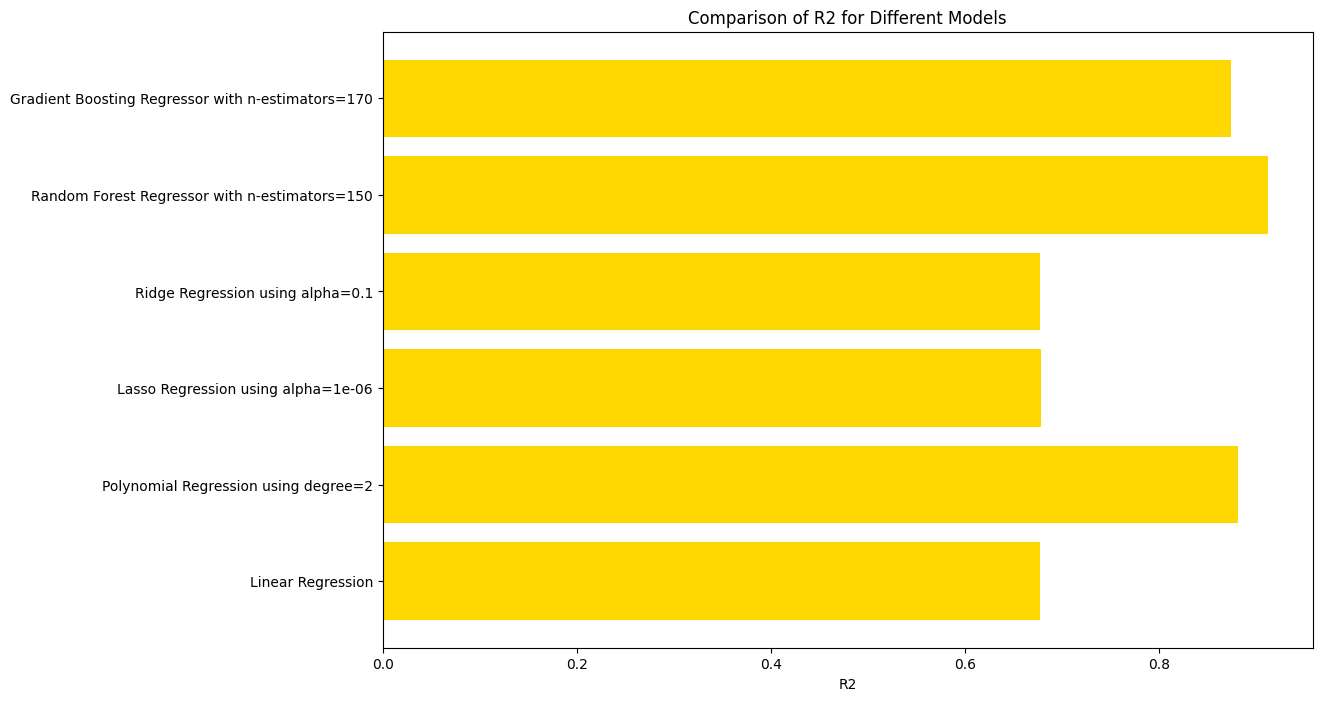

In [ ]:
# Extract model names and their corresponding R2 values
model_names = list(evaluation_metrics.keys())
rmse_values = [metrics["R2"] for metrics in evaluation_metrics.values()]

# Create a bar plot
plt.figure(figsize=(12, 8))
plt.barh(model_names, rmse_values, color='gold')
plt.xlabel('R2')
plt.title('Comparison of R2 for Different Models')
plt.show()

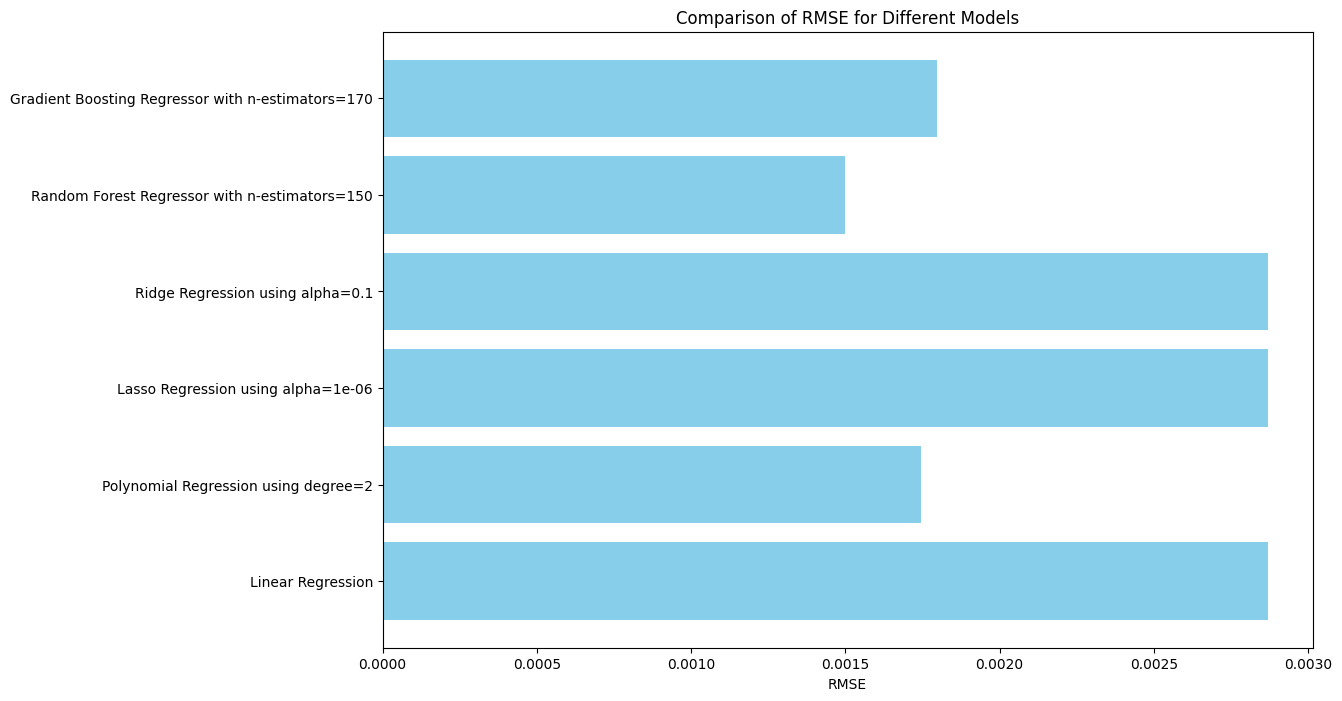

In [ ]:
# Extract model names and their corresponding RMSE values
model_names = list(evaluation_metrics.keys())
rmse_values = [metrics["RMSE"] for metrics in evaluation_metrics.values()]

# Create a bar plot
plt.figure(figsize=(12, 8))
plt.barh(model_names, rmse_values, color='skyblue')
plt.xlabel('RMSE')
plt.title('Comparison of RMSE for Different Models')
plt.show()

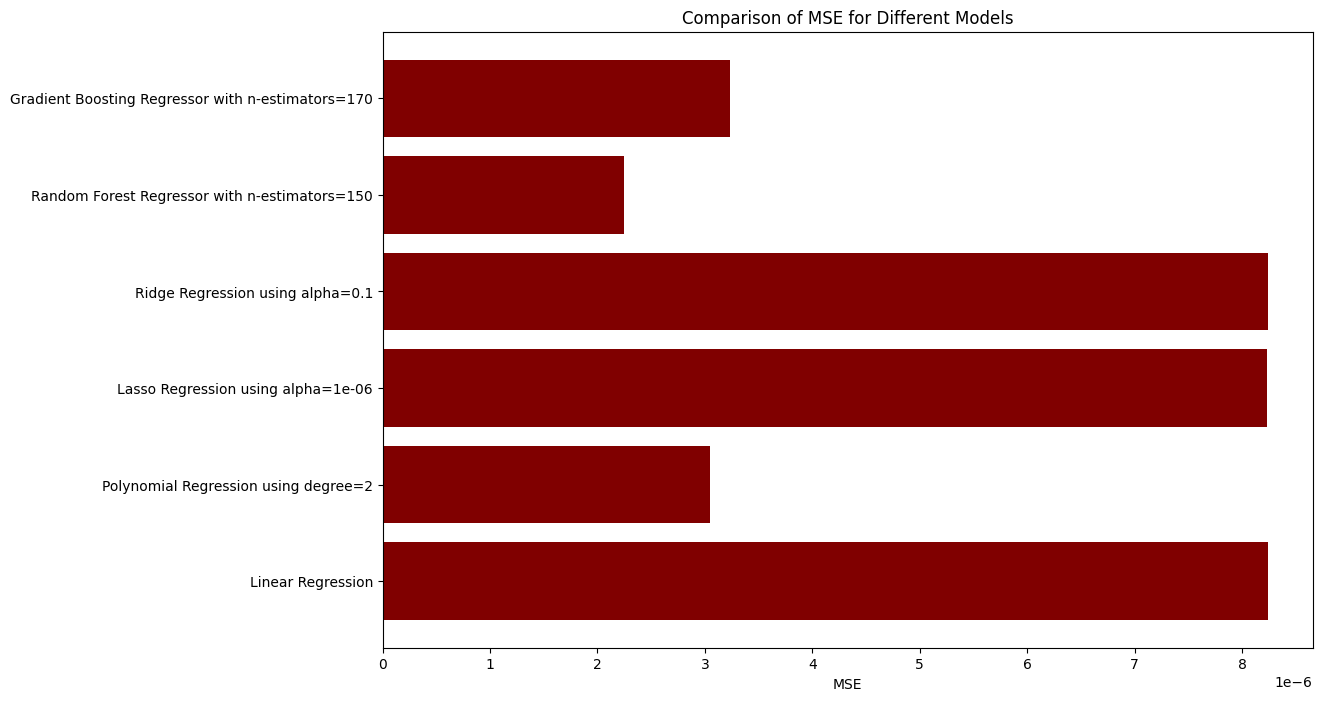

In [ ]:
# Extract model names and their corresponding RMSE values
model_names = list(evaluation_metrics.keys())
rmse_values = [metrics["MSE"] for metrics in evaluation_metrics.values()]

# Create a bar plot
plt.figure(figsize=(12, 8))
plt.barh(model_names, rmse_values, color='maroon')
plt.xlabel('MSE')
plt.title('Comparison of MSE for Different Models')
plt.show()

In [ ]:
# Find the best model based on each criterion
best_models = {
    "MSE": min(evaluation_metrics, key=lambda x: evaluation_metrics[x]["MSE"]),
    "RMSE": min(evaluation_metrics, key=lambda x: evaluation_metrics[x]["RMSE"]),
    "R2": max(evaluation_metrics, key=lambda x: evaluation_metrics[x]["R2"])
}

# Report the best models for each criterion
for criterion, best_model in best_models.items():
    print(f"Best Model based on {criterion}: {best_model}")

# Best model overall
best_model_overall = min(best_models.values(), key=lambda x: evaluation_metrics[x][criterion])
print(f"Best Model Overall: {best_model_overall}")

Best Model based on MSE: Random Forest Regressor with n-estimators=150
Best Model based on RMSE: Random Forest Regressor with n-estimators=150
Best Model based on R2: Random Forest Regressor with n-estimators=150
Best Model Overall: Random Forest Regressor with n-estimators=150
